___
# `Project-03` Avacodo
___

In [163]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px
# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser
import wikipedia

import warnings
warnings.filterwarnings('ignore')

In [164]:
# importing the dataset
df = pd.read_excel('avocado.xlsx',parse_dates=['Date'])

In [165]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,2016-10-09,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,2016-10-02,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [166]:
# check the shape of the dataset

In [167]:
df.shape

(1517, 13)

* The dataset consists of 1517 samples in totla and 12 Features and 1 target.

In [168]:
# information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  year          1517 non-null   int64         
 12  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 154.2+ KB


In [169]:
# classify the numerical features and the categroical features into 2 different lists.
from feature_engine.missing_data_imputers import _find_categorical_variables,_find_numerical_variables

In [170]:
# numerical variables
num_var = _find_numerical_variables(df)
# categorical features
cat_var = _find_categorical_variables(df)

In [171]:
# num var
num_var,len(num_var)

(['AveragePrice',
  'Total Volume',
  4046,
  4225,
  4770,
  'Total Bags',
  'Small Bags',
  'Large Bags',
  'XLarge Bags',
  'year'],
 10)

In [172]:
# cat var
cat_var,len(cat_var)

(['type', 'region'], 2)

* IN the dataset we have 12 numerical type variables and 2 categorical type variables

In [173]:
# description of the dataset
df.describe(include='all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517,1517.000000,1517
unique,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,51
top,2015-04-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,California
freq,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1517,NaN,76
first,2015-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-12-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,NaN,2015.162821,NaN
std,NaN,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,NaN,0.369324,NaN
min,NaN,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,NaN,2015.000000,NaN


In [174]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [175]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [176]:
df.tail( )

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,2016-10-09,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,2016-10-02,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,2016-09-18,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


In [177]:
df.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
678,2015-04-12,1.43,1084407.80,18928.26,764676.24,1846.37,298956.93,239070.00,59886.93,0.00,conventional,2015,NewYork
1186,2015-05-24,1.04,35344183.15,16000107.80,12513821.19,899779.92,5930474.24,5094263.38,815628.55,20582.31,conventional,2015,TotalUS
854,2015-11-01,1.06,423475.77,98262.62,182672.87,11993.63,130546.65,130164.27,123.39,258.99,conventional,2015,Portland
1476,2016-06-26,1.03,6407277.49,2333532.13,1967324.63,328206.37,1778214.36,1641400.92,107903.90,28909.54,conventional,2016,California
1488,2016-04-03,0.93,6060843.76,1805555.95,2247248.19,334735.17,1673304.45,1454479.46,201547.46,17277.53,conventional,2016,California


In [178]:
# check for the missing values in the dataset.
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

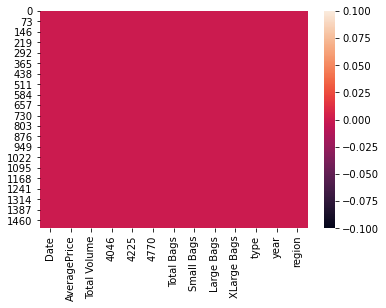

In [179]:
# plot the missing values
sns.heatmap(df.isna())

In [180]:
# correlation of the features in the dataset.
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


In [181]:
# helper function
def fig_this_size(x,y):
    
    return plt.figure(figsize=(x,y))

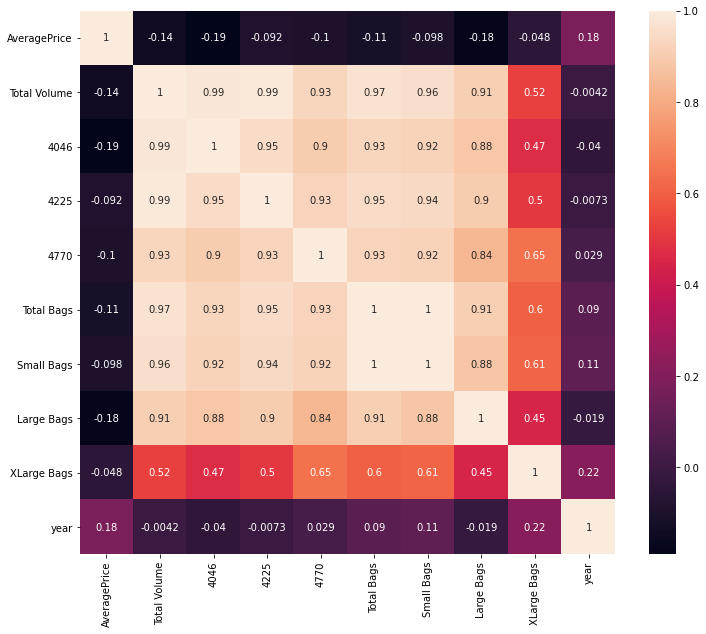

In [182]:
fig_this_size(12,10)
sns.heatmap(df.corr(),annot=True)

In [183]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [184]:
# univariate analysis 

In [185]:
# average price (target)

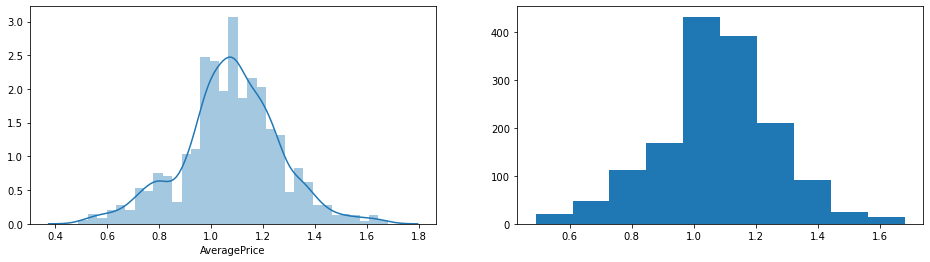

In [186]:
fig = fig_this_size(16,4)

fig.add_subplot(121)
sns.distplot(df.AveragePrice)

fig.add_subplot(122)
plt.hist(df.AveragePrice);

* All the prices for avocado are between 0 to 2 Dollars.

In [187]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,2016-10-09,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,2016-10-02,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


* The PLU is the abbreviation of Price Look-up code.
* The regions in the dataset are cities of The States.
* Different PLU codes gives different type of avocado sizes.

In [188]:
df.rename(columns={4046:'Small(4046)',4225:'Large(4225)',4770:'Extra_Large(4770)'},inplace=True)

In [189]:
df.head()

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [190]:
#avocado_info = pd.read_clipboard(sep='-',header=None)

In [191]:
#avocado_info.columns = ['Feature','Detail']

In [192]:
#avocado_info.set_index('Feature',inplace=True)

In [193]:
#avocado_info

In [194]:
#avocado_info.to_csv('avocado_info.csv')

In [195]:
avocado_info = pd.read_csv('avocado_info.csv')

In [196]:
avocado_info

,Feature,Detail
0,Date,The date of the observation
1,AveragePrice,the average price of a single avocado
2,type,conventional or organic
3,year,the year
4,Region,the city or region of the observation
5,Total Volume,Total number of avocados sold
6,4046,Total number of avocados with PLU 4046 sold
7,4225,Total number of avocados with PLU 4225 sold
8,4770,Total number of avocados with PLU 4770 sold


In [197]:
df.head()

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [198]:
# Check data of many years is present
df.year.value_counts()

2015    1270
2016     247
Name: year, dtype: int64

* The dataset consists drop from the year 2015 and 2016, mostly from year 2016.

In [199]:
avocado_info

,Feature,Detail
0,Date,The date of the observation
1,AveragePrice,the average price of a single avocado
2,type,conventional or organic
3,year,the year
4,Region,the city or region of the observation
5,Total Volume,Total number of avocados sold
6,4046,Total number of avocados with PLU 4046 sold
7,4225,Total number of avocados with PLU 4225 sold
8,4770,Total number of avocados with PLU 4770 sold


In [200]:
# Let's do a region wise comparision
df_region_gp = df.groupby('region').mean().reset_index()

In [201]:
df_region_gp.head()

,region,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,Albany,1.238657,76290.195373,1732.056418,61854.520000,537.329104,12166.289851,11815.495821,347.246866,3.547164,2015.223881
1,Atlanta,1.012037,467637.160926,321488.462222,59049.533519,881.809444,86217.355741,47409.986852,38747.062407,60.306481,2015.277778
2,BaltimoreWashington,1.160923,807644.197385,58638.556308,526173.797231,38148.926769,184682.917077,180188.986769,4221.447231,272.483077,2015.369231
3,Boise,0.974923,81046.168769,42798.471077,6462.110769,5731.225385,26054.361538,25269.963077,748.342154,36.056308,2015.615385
4,Boston,1.205484,553458.590000,7450.541613,402427.638871,21224.216935,122356.192581,121016.016935,764.848710,575.326935,2015.709677


In [202]:
# Average price of an Avocado per region in the year 2015.
px.bar(df_region_gp[df_region_gp.year != 2015].sort_values('AveragePrice',ascending=False),'region','AveragePrice',color='Total Volume')

In [203]:
# Average price of an Avocado per region in the year 2016.
px.bar(df_region_gp[((df_region_gp.year != 2016) & (df_region_gp.region != 'TotalUS'))].sort_values('AveragePrice',ascending=False),'region','AveragePrice',color='Total Volume',)

In [204]:
%%html
<img src="https://www.touropia.com/gfx/b/2014/02/usa.png" width=500 height=500 />

* In the year 2015,the highest average price of an Avocado was in Charlotte.
* Whereas in the year 2016, the highest average price of an Avocado was in Syracuse.
* Charlotte is the commercial hub in the state of North Carolina so the prices we ought to be relatively higher than other
states.
* Syracuse is one of the upstate city with highest global snowball awards.
* Whereas the highest was in the city of California.
* Cali is the hub for rich people and Celebrities. 
* Avocado is one of the main food in the diet of these rich people, so more sales of the fruit is obvious in California.
* Another reason is California is the state with 2nd highest population in The States.
* Note: We have very less data from the year 2015.

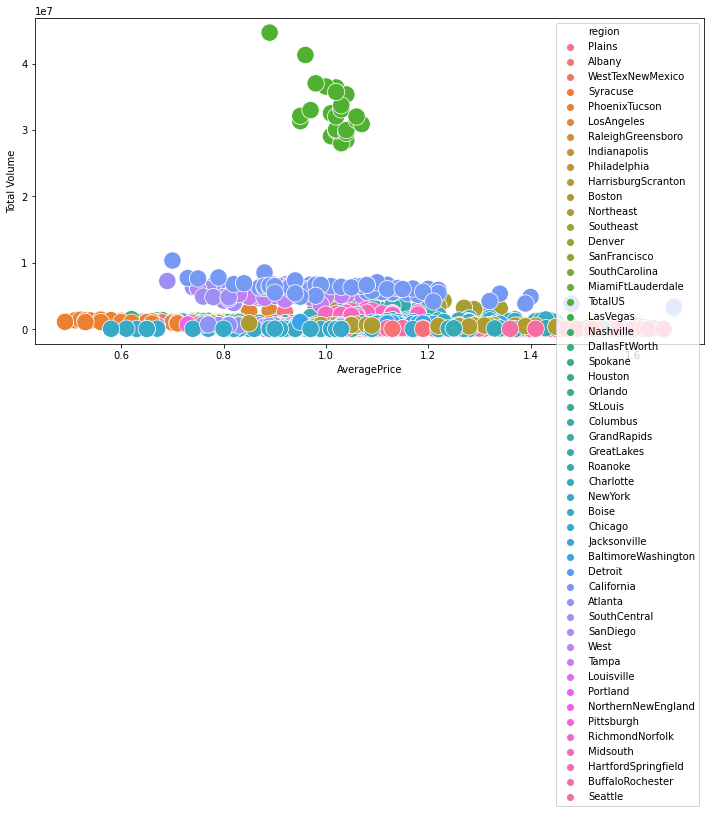

In [506]:
# price to volumne
fig_this_size(12,6)
sns.scatterplot(df.AveragePrice,df['Total Volume'],hue=df.region,s=300)

In [205]:
df_region_gp

,region,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,Albany,1.238657,7.629020e+04,1.732056e+03,6.185452e+04,537.329104,1.216629e+04,1.181550e+04,347.246866,3.547164,2015.223881
1,Atlanta,1.012037,4.676372e+05,3.214885e+05,5.904953e+04,881.809444,8.621736e+04,4.740999e+04,38747.062407,60.306481,2015.277778
2,BaltimoreWashington,1.160923,8.076442e+05,5.863856e+04,5.261738e+05,38148.926769,1.846829e+05,1.801890e+05,4221.447231,272.483077,2015.369231
3,Boise,0.974923,8.104617e+04,4.279847e+04,6.462111e+03,5731.225385,2.605436e+04,2.526996e+04,748.342154,36.056308,2015.615385
4,Boston,1.205484,5.534586e+05,7.450542e+03,4.024276e+05,21224.216935,1.223562e+05,1.210160e+05,764.848710,575.326935,2015.709677
5,BuffaloRochester,1.301569,1.321844e+05,1.576289e+03,6.379754e+04,195.697255,6.661483e+04,6.554765e+04,384.352549,682.826667,2015.823529
6,California,1.055921,6.035277e+06,2.410017e+06,1.984823e+06,225314.512500,1.415122e+06,1.286774e+06,109555.190526,18792.960132,2015.684211
7,Charlotte,1.311613,1.762781e+05,4.332415e+04,4.502836e+04,29937.738710,5.798790e+04,5.270983e+04,5230.527742,47.535806,2015.483871
8,Chicago,1.214783,8.118822e+05,3.814420e+04,5.681663e+05,107273.196087,9.829844e+04,9.470367e+04,3061.164348,533.601304,2015.000000
9,Columbus,1.012553,1.457604e+05,7.011329e+04,3.233892e+04,18676.642766,2.463157e+04,1.866047e+04,4032.940000,1938.165745,2015.000000


In [206]:
df_2015 = pd.DataFrame(df[df.year != 2015].groupby('region').mean().sort_values('AveragePrice',ascending=False)['AveragePrice'])

In [207]:
df_2015

,AveragePrice
region,
Albany,1.470000
Charlotte,1.457333
BuffaloRochester,1.295238
Boston,1.215909
BaltimoreWashington,1.148750
California,1.046154
Boise,0.923000
Atlanta,0.914667


In [208]:
df_2016 = pd.DataFrame(df[df.year != 2016].groupby('region').mean().sort_values('AveragePrice',ascending=False)['AveragePrice'])

In [209]:
df_2016

,AveragePrice
region,
Syracuse,1.347368
BuffaloRochester,1.331111
Philadelphia,1.293846
StLouis,1.260000
NewYork,1.248636
Northeast,1.236667
Chicago,1.214783
HartfordSpringfield,1.209231
Boston,1.180000


In [210]:
df_comp = pd.merge(df_2015, df_2016, left_index=True, right_index=True,suffixes=('_2015','_2016'))

Text(0.5, 1.0, 'Comparison of Some Cities')

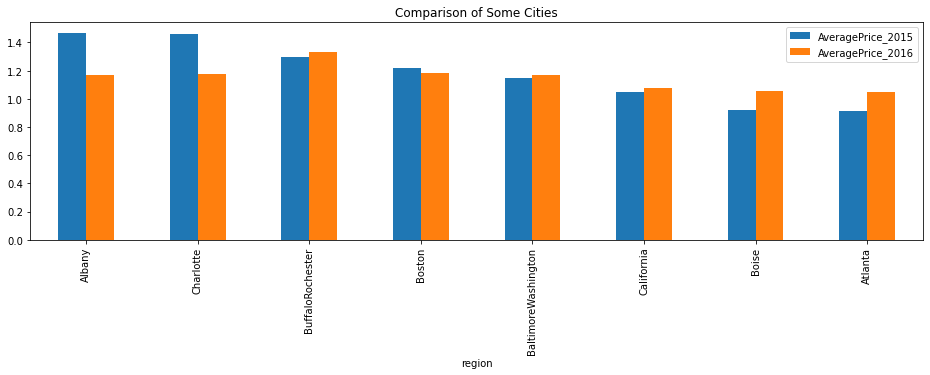

In [211]:
df_comp.plot(kind='bar',figsize=(16,4))
plt.title('Comparison of Some Cities')

* Cities with high AveragePrice like Albany, Charlotte and Boston saw a decline in the rate of Avacado.
* Other cities witnessed a hike in unit avocado average price.

In [212]:
df.head()

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [213]:
# total volume

df_vol_top_10 = df.groupby('region').mean().sort_values('Total Volume',ascending=False).iloc[1:11,:]

In [214]:
df_vol_top_10

,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,
California,1.055921,6.035277e+06,2.410017e+06,1.984823e+06,225314.512500,1.415122e+06,1.286774e+06,109555.190526,18792.960132,2015.684211
West,0.940833,5.574939e+06,2.348945e+06,2.040127e+06,124529.191111,1.061338e+06,7.447474e+05,315172.970278,1417.661111,2015.000000
SouthCentral,0.818718,5.496995e+06,3.077958e+06,1.625283e+06,109997.714359,6.837558e+05,5.549597e+05,123663.470256,5132.639487,2015.000000
Northeast,1.236667,3.465864e+06,1.073529e+05,2.427952e+06,7251.636667,9.233073e+05,8.325909e+05,90716.120000,0.272500,2015.000000
GreatLakes,1.107222,3.276358e+06,5.652089e+05,1.720079e+06,300844.177222,6.902264e+05,5.701240e+05,103211.250556,16891.117778,2015.000000
Southeast,1.091111,3.055239e+06,2.195695e+06,2.826350e+05,23959.242222,5.529500e+05,3.165600e+05,236389.612222,0.331111,2015.000000
LosAngeles,0.863333,2.732180e+06,1.849780e+06,5.559236e+05,60827.640000,2.656486e+05,2.331338e+05,29588.213333,2926.593333,2015.000000
Midsouth,1.081111,2.355099e+06,5.020956e+05,1.163150e+06,188945.888889,5.009069e+05,4.444993e+05,54315.115000,2092.557222,2015.000000
Plains,1.051667,1.672975e+06,9.263925e+05,4.891971e+05,12983.525833,2.444021e+05,2.414715e+05,1871.381667,1059.265833,2015.000000


In [215]:
avocado_info

,Feature,Detail
0,Date,The date of the observation
1,AveragePrice,the average price of a single avocado
2,type,conventional or organic
3,year,the year
4,Region,the city or region of the observation
5,Total Volume,Total number of avocados sold
6,4046,Total number of avocados with PLU 4046 sold
7,4225,Total number of avocados with PLU 4225 sold
8,4770,Total number of avocados with PLU 4770 sold


In [216]:
# total volumne is the total number of avocado sold.

In [217]:
# let's look a the 10 highest selling regions in The US on average.
px.bar(df_vol_top_10,df_vol_top_10.index,'Total Volume')

* California, The WestSide and the South-Central are the Regions with highest sell of avacodo.

In [218]:
df_region_gp = df_region_gp.sort_values('Total Volume',ascending=True)

Let's see what type of avocados are morein demand in the top 10 selling regions

In [219]:
df_vol_top_10

,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,
California,1.055921,6.035277e+06,2.410017e+06,1.984823e+06,225314.512500,1.415122e+06,1.286774e+06,109555.190526,18792.960132,2015.684211
West,0.940833,5.574939e+06,2.348945e+06,2.040127e+06,124529.191111,1.061338e+06,7.447474e+05,315172.970278,1417.661111,2015.000000
SouthCentral,0.818718,5.496995e+06,3.077958e+06,1.625283e+06,109997.714359,6.837558e+05,5.549597e+05,123663.470256,5132.639487,2015.000000
Northeast,1.236667,3.465864e+06,1.073529e+05,2.427952e+06,7251.636667,9.233073e+05,8.325909e+05,90716.120000,0.272500,2015.000000
GreatLakes,1.107222,3.276358e+06,5.652089e+05,1.720079e+06,300844.177222,6.902264e+05,5.701240e+05,103211.250556,16891.117778,2015.000000
Southeast,1.091111,3.055239e+06,2.195695e+06,2.826350e+05,23959.242222,5.529500e+05,3.165600e+05,236389.612222,0.331111,2015.000000
LosAngeles,0.863333,2.732180e+06,1.849780e+06,5.559236e+05,60827.640000,2.656486e+05,2.331338e+05,29588.213333,2926.593333,2015.000000
Midsouth,1.081111,2.355099e+06,5.020956e+05,1.163150e+06,188945.888889,5.009069e+05,4.444993e+05,54315.115000,2092.557222,2015.000000
Plains,1.051667,1.672975e+06,9.263925e+05,4.891971e+05,12983.525833,2.444021e+05,2.414715e+05,1871.381667,1059.265833,2015.000000


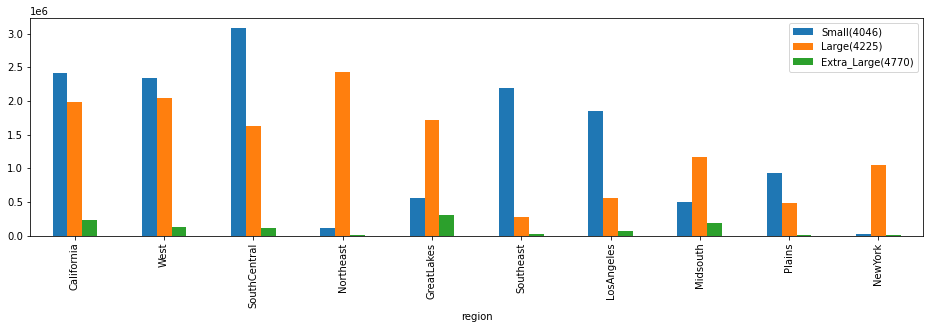

In [220]:
df_vol_top_10.iloc[:,2:5].plot(kind='bar',figsize=(16,4))

* The sale of PLU 4770 is not that great in sales, relative to Large and Small.
* Americans tend to prefer large hass (PLU 4225)

In [221]:
# comarting all PLU in detail

In [222]:
df_plu = df.groupby('region').sum()['Small(4046) Large(4225) Extra_Large(4770)'.split()]

In [223]:
px.bar(df_plu.sum(),x = df_plu.sum().index,y = df_plu.sum())

* Extra_Large Hass Avocado is very less in demand than Small and Large.

In [224]:
# Since California has a high selling of avacados ( in total), let's dive into furhter study of Avocados in california

In [225]:
# for this, Let's do some feature engineering and get a month feautre

In [226]:
df.head()

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [227]:
df['month'] = df.Date.apply(lambda x:x.month_name())

In [228]:
df.head()

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November


In [229]:
df_cali = df[df.region == 'California']

In [230]:
df_cali

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
184,2015-09-06,1.09,5806392.78,2859325.91,2077193.60,240185.00,629688.27,591629.83,33545.37,4513.07,conventional,2015,California,September
185,2015-08-30,1.08,5647385.15,3104607.82,1660274.32,233027.36,649475.65,640600.64,5989.25,2885.76,conventional,2015,California,August
186,2015-08-23,1.18,5193221.00,2626977.95,1798911.33,222082.91,545248.81,535183.95,6573.50,3491.36,conventional,2015,California,August
187,2015-08-16,1.11,5616434.08,3098708.55,1731349.00,208724.73,577651.80,572197.46,2081.96,3372.38,conventional,2015,California,August
188,2015-08-09,1.10,6232081.27,3260775.73,2196704.97,193831.60,580768.97,570728.54,7356.84,2683.59,conventional,2015,California,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,2016-01-31,0.88,6506673.96,2126066.85,2069192.92,287234.03,2024180.16,1874982.24,134692.75,14505.17,conventional,2016,California,January
1498,2016-01-24,0.88,6246380.73,1230068.19,2457751.77,272665.17,2285895.60,2122673.09,147881.99,15340.52,conventional,2016,California,January
1499,2016-01-17,0.90,6000013.23,1653347.69,2336705.19,250106.17,1759854.18,1579233.60,162289.68,18330.90,conventional,2016,California,January
1500,2016-01-10,0.87,6303406.82,1736168.01,2173554.18,261931.07,2131753.56,1793640.16,321613.97,16499.43,conventional,2016,California,January


In [231]:
df_cali[df_cali.year == 2015].sort_values('Date')

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
207,2015-03-29,1.10,5341821.67,2609532.63,1869271.31,193577.55,669440.18,605995.11,61958.73,1486.34,conventional,2015,California,March
206,2015-04-05,1.12,5467155.55,2754464.87,1886168.89,225396.85,601124.94,539258.29,59212.09,2654.56,conventional,2015,California,April
205,2015-04-12,1.06,5636644.51,2848184.00,1988818.23,185198.77,614443.51,532714.02,79865.30,1864.19,conventional,2015,California,April
204,2015-04-19,1.05,5871080.81,3024466.22,2070974.14,177354.82,598285.63,524767.96,71988.59,1529.08,conventional,2015,California,April
203,2015-04-26,1.15,4923565.04,2421009.67,1729486.77,196469.02,576599.58,548252.41,26483.99,1863.18,conventional,2015,California,April
202,2015-05-03,0.88,8567534.49,4340117.03,3403145.10,192473.92,631798.44,609388.58,19735.89,2673.97,conventional,2015,California,May
201,2015-05-10,0.93,6650357.96,4085858.78,1735132.32,194575.97,634790.89,613601.09,18366.27,2823.53,conventional,2015,California,May
200,2015-05-17,1.08,5289138.50,2923673.93,1649623.66,168597.35,547243.56,525804.70,18497.03,2941.83,conventional,2015,California,May
199,2015-05-24,1.10,5621713.64,2978396.74,1873205.91,195991.06,574119.93,546420.69,24485.84,3213.40,conventional,2015,California,May
198,2015-05-31,0.98,6236903.31,3620440.35,1826496.62,209443.33,580523.01,554224.64,23083.08,3215.29,conventional,2015,California,May


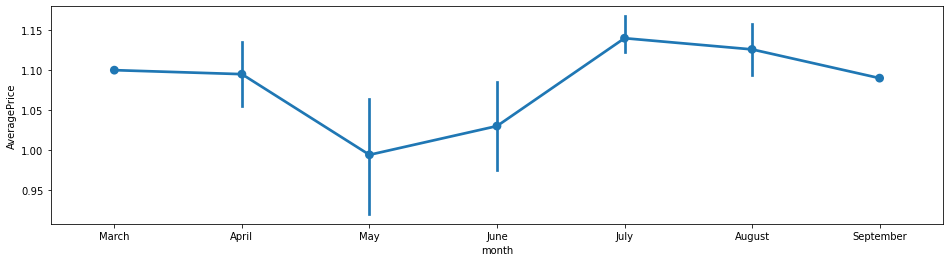

In [232]:
# Point plot per month in year 2015
fig_this_size(16,4)
sns.pointplot(x=df_cali[df_cali.year == 2015].sort_values('Date')['month'],y=df_cali.AveragePrice)

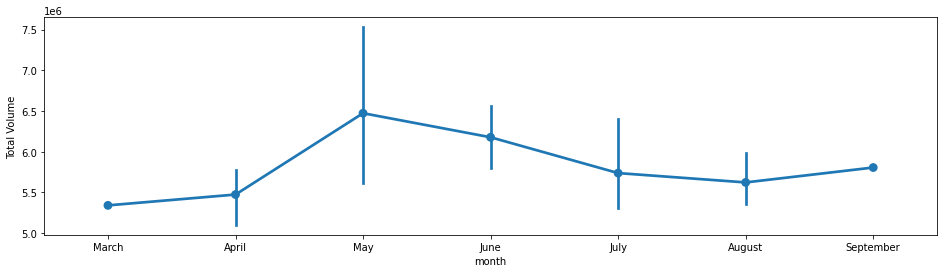

In [233]:
# Point plot per month in year 2015 for the Total Volume Sold in California
fig_this_size(16,4)
sns.pointplot(x=df_cali[df_cali.year == 2015].sort_values('Date')['month'],y=df_cali['Total Volume'])

* For the Year 2015,
* we have data from March to September
* The Price of Avocado goes down from April to May and then gradually increases.
* The point plot for 2016 will give us better ideas.
* When the prices are low i.e. in the month of May (More people tend to by avacodo)

In [234]:
df_cali[df_cali.year == 2016].sort_values('Date')

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
1501,2016-01-03,0.73,7730431.28,2315175.35,2856102.41,257268.16,2301885.36,1950428.50,340852.13,10604.73,conventional,2016,California,January
1500,2016-01-10,0.87,6303406.82,1736168.01,2173554.18,261931.07,2131753.56,1793640.16,321613.97,16499.43,conventional,2016,California,January
1499,2016-01-17,0.90,6000013.23,1653347.69,2336705.19,250106.17,1759854.18,1579233.60,162289.68,18330.90,conventional,2016,California,January
1498,2016-01-24,0.88,6246380.73,1230068.19,2457751.77,272665.17,2285895.60,2122673.09,147881.99,15340.52,conventional,2016,California,January
1497,2016-01-31,0.88,6506673.96,2126066.85,2069192.92,287234.03,2024180.16,1874982.24,134692.75,14505.17,conventional,2016,California,January
1496,2016-02-07,0.70,10361698.17,2930343.28,3950852.38,424389.60,3056112.91,2693843.02,344774.59,17495.30,conventional,2016,California,February
1495,2016-02-14,0.82,6807283.15,1998149.71,1974912.11,278558.48,2555662.85,2207054.69,333029.79,15578.37,conventional,2016,California,February
1494,2016-02-21,0.89,6374019.03,1776499.00,2073957.12,267508.94,2256053.97,2073467.05,167309.24,15277.68,conventional,2016,California,February
1493,2016-02-28,0.89,6588277.70,1873878.11,2020327.87,302210.56,2391861.16,2091747.51,282242.79,17870.86,conventional,2016,California,February
1492,2016-03-06,0.92,6429870.23,1893787.20,1975668.02,325582.20,2234832.81,1981931.04,230048.66,22853.11,conventional,2016,California,March


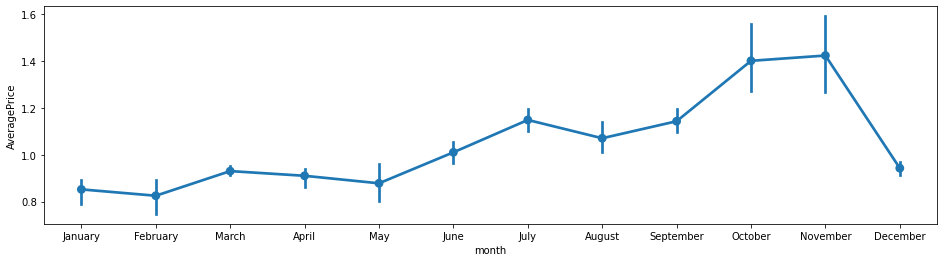

In [235]:
# Point plot per month in year 2015
fig_this_size(16,4)
sns.pointplot(x=df_cali[df_cali.year == 2016].sort_values('Date')['month'],y=df_cali.AveragePrice)

* The prices of avocado increases in Winter.

In [236]:
# Let's give a look at sales in california

In [237]:
df_cali.head()

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
184,2015-09-06,1.09,5806392.78,2859325.91,2077193.60,240185.00,629688.27,591629.83,33545.37,4513.07,conventional,2015,California,September
185,2015-08-30,1.08,5647385.15,3104607.82,1660274.32,233027.36,649475.65,640600.64,5989.25,2885.76,conventional,2015,California,August
186,2015-08-23,1.18,5193221.00,2626977.95,1798911.33,222082.91,545248.81,535183.95,6573.50,3491.36,conventional,2015,California,August
187,2015-08-16,1.11,5616434.08,3098708.55,1731349.00,208724.73,577651.80,572197.46,2081.96,3372.38,conventional,2015,California,August
188,2015-08-09,1.10,6232081.27,3260775.73,2196704.97,193831.60,580768.97,570728.54,7356.84,2683.59,conventional,2015,California,August


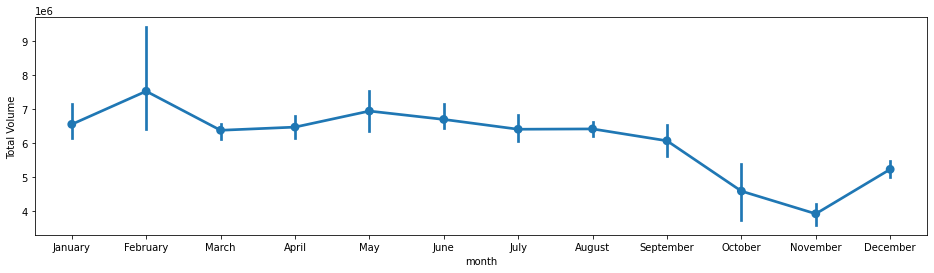

In [238]:
# Point plot per month in year 2016 for the Total Volume Sold in California
fig_this_size(16,4)
sns.pointplot(x=df_cali[df_cali.year == 2016].sort_values('Date')['month'],y=df_cali['Total Volume'])

* <b>As the Inflation increases, demand decreases.</b> This is a great example to support this statement.

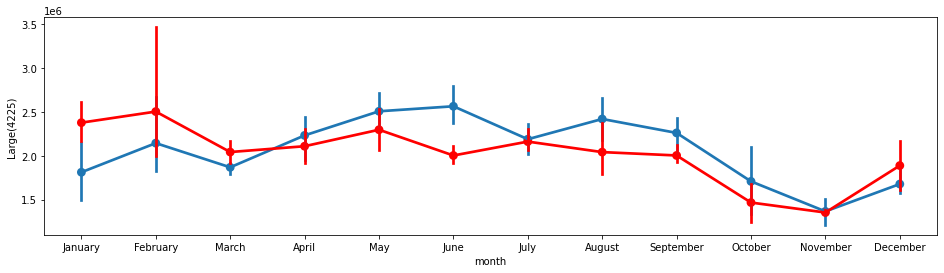

In [239]:
# comparing the type size of avocodo in california
fig_this_size(16,4)
sns.pointplot(x=df_cali[df_cali.year == 2016].sort_values('Date')['month'],y=df_cali['Small(4046)'])
sns.pointplot(x=df_cali[df_cali.year == 2016].sort_values('Date')['month'],y=df_cali['Large(4225)'],color='r')

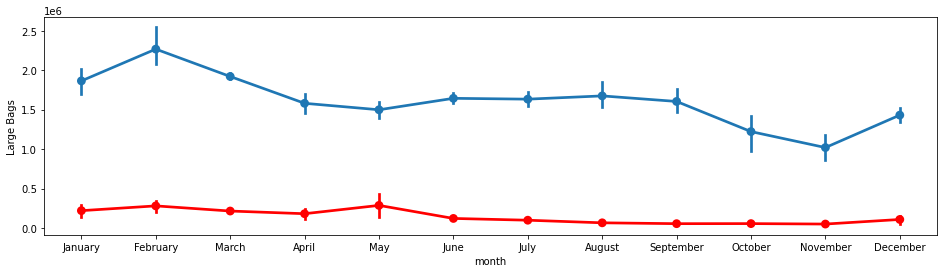

In [240]:
# Also,let's look at the bags sold in 2016 in california
# comparing the type size of avocodo in california
fig_this_size(16,4)
sns.pointplot(x=df_cali[df_cali.year == 2016].sort_values('Date')['month'],y=df_cali['Small Bags'])
sns.pointplot(x=df_cali[df_cali.year == 2016].sort_values('Date')['month'],y=df_cali['Large Bags'],color='r')

In [241]:
## Lets look at the country level now

In [242]:
df = df.sort_values('Date')

In [243]:
df.head()

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
845,2015-01-04,1.01,1683795.30,1027842.30,466641.12,10476.89,178834.99,177360.20,440.57,1034.22,conventional,2015,Plains,January
51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,January
1269,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,conventional,2015,WestTexNewMexico,January
1147,2015-01-04,1.33,41143.51,2506.61,20905.01,16.68,17715.21,17715.21,0.00,0.00,conventional,2015,Syracuse,January
811,2015-01-04,0.65,1048062.16,770635.37,178418.32,6509.41,92499.06,92499.06,0.00,0.00,conventional,2015,PhoenixTucson,January


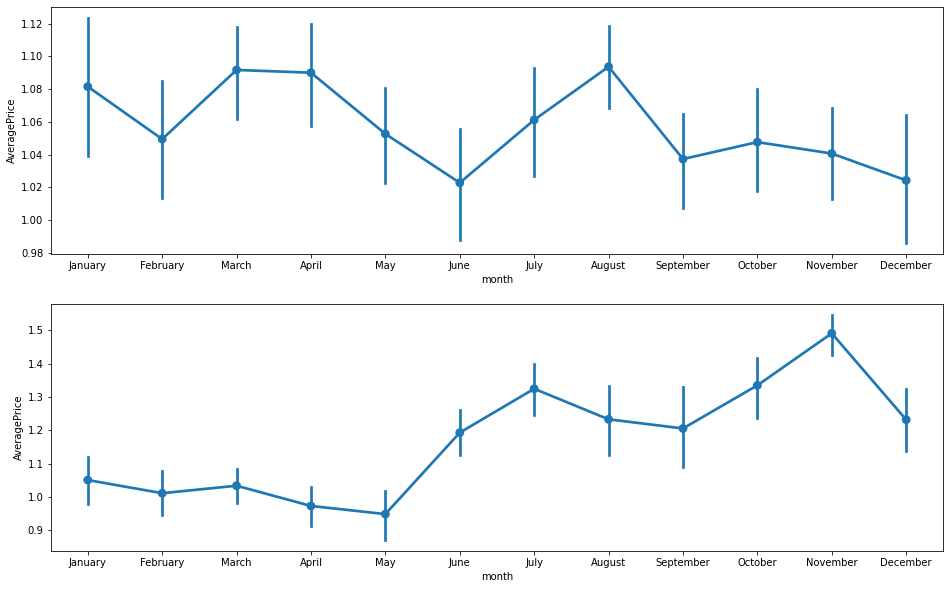

In [244]:
fig = fig_this_size(16,10)

plt.subplot(211)
sns.pointplot(x=df[df.year == 2015]['month'],y=df[df.year == 2015].AveragePrice)
plt.subplot(212)
sns.pointplot(x=df[df.year == 2016]['month'],y=df[df.year == 2016].AveragePrice)

* The unit average price was gradually increasing in 2016, unlike 2015,where the year was montains and valleys.

In [245]:
# sales in the country over the 2 years

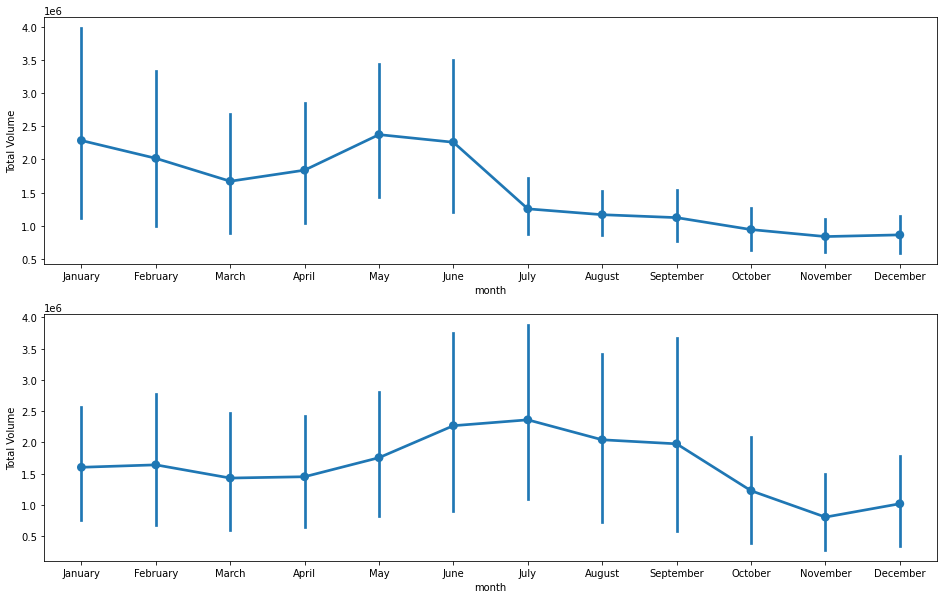

In [246]:
fig = fig_this_size(16,10)

plt.subplot(211)
sns.pointplot(x=df[df.year == 2015]['month'],y=df[df.year == 2015]['Total Volume'])
plt.subplot(212)
sns.pointplot(x=df[df.year == 2016]['month'],y=df[df.year == 2016]['Total Volume'])

* We can see that long confidence lines, they show the variattion in the prices and sales by all the regions.

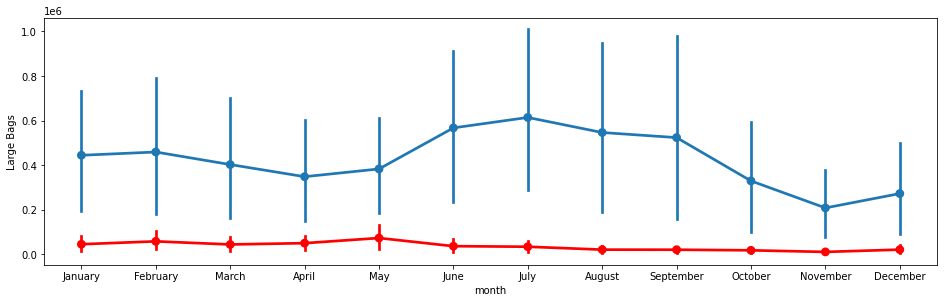

In [247]:
fig = fig_this_size(16,10)

plt.subplot(211)
sns.pointplot(x=df[df.year == 2016]['month'],y=df[df.year == 2016]['Small Bags'])

sns.pointplot(x=df[df.year == 2016]['month'],y=df[df.year == 2016]['Large Bags'],color='r')

* The sales of Bags of small sized avocados dominated the market all over The States in 2016.
* So, we can conclude that the comapany should make more small sized Avocados (PLU 4024)

In [248]:
df

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
845,2015-01-04,1.01,1683795.30,1027842.30,466641.12,10476.89,178834.99,177360.20,440.57,1034.22,conventional,2015,Plains,January
51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,January
1269,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,conventional,2015,WestTexNewMexico,January
1147,2015-01-04,1.33,41143.51,2506.61,20905.01,16.68,17715.21,17715.21,0.00,0.00,conventional,2015,Syracuse,January
811,2015-01-04,0.65,1048062.16,770635.37,178418.32,6509.41,92499.06,92499.06,0.00,0.00,conventional,2015,PhoenixTucson,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,2016-12-25,1.03,71168.92,27464.22,2892.64,6681.19,34130.87,33449.40,662.22,19.25,conventional,2016,Boise,December
1364,2016-12-25,1.28,447600.75,4349.63,346516.32,4183.69,92551.11,91481.59,1069.52,0.00,conventional,2016,Boston,December
1408,2016-12-25,1.41,103035.45,1197.33,64434.59,42.09,37361.44,35701.24,1660.20,0.00,conventional,2016,BuffaloRochester,December
1502,2016-12-25,1.25,155793.03,36125.58,50792.48,7324.64,61550.33,51247.91,10232.98,69.44,conventional,2016,Charlotte,December


In [249]:
num_var = _find_numerical_variables(df)

In [250]:
# year is a non real value, its redunant yet a categoriy value 
num_var.remove('year')

In [251]:
# total volumne

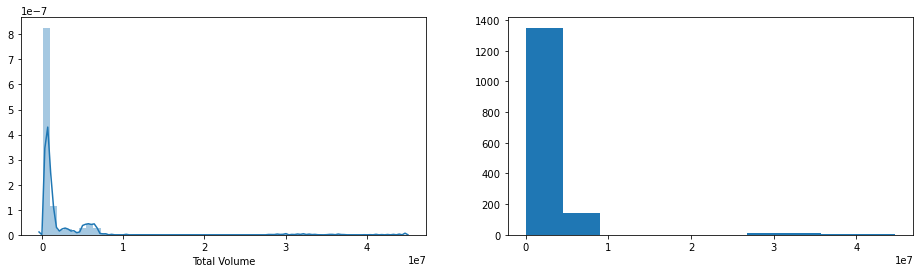

In [252]:
fig = fig_this_size(16,4)

fig.add_subplot(121)
sns.distplot(df['Total Volume'])

fig.add_subplot(122)
plt.hist(df['Total Volume']);

* Some outliers are making the total volumne variable highly skewed

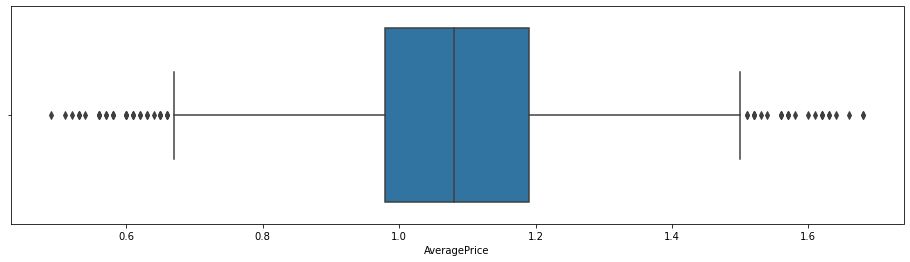

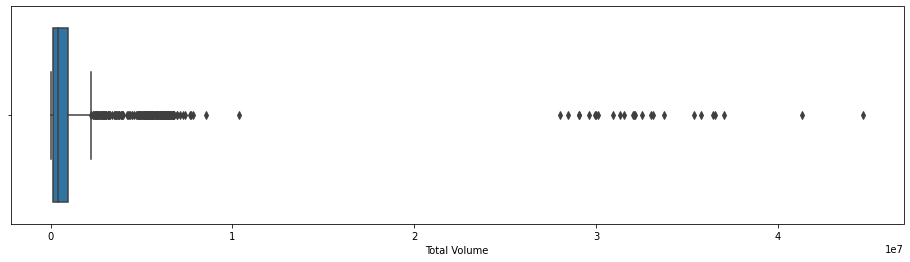

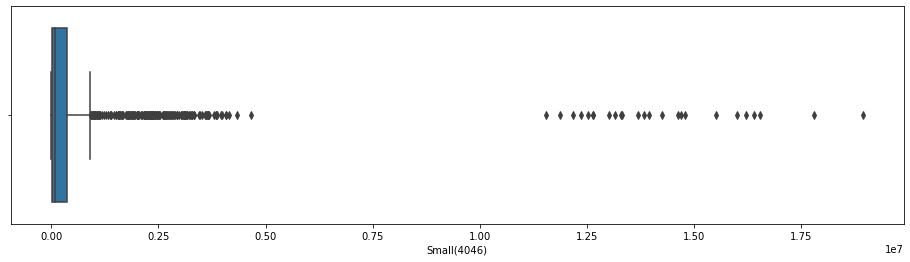

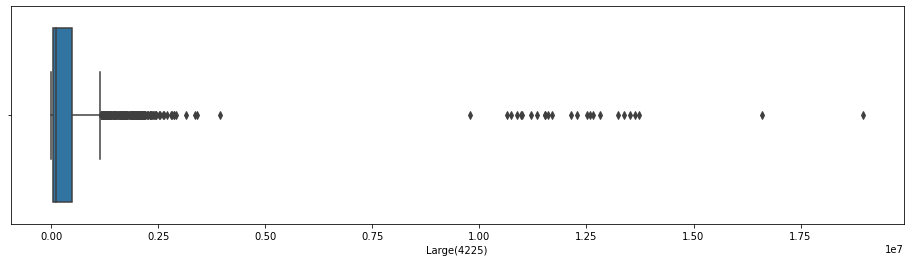

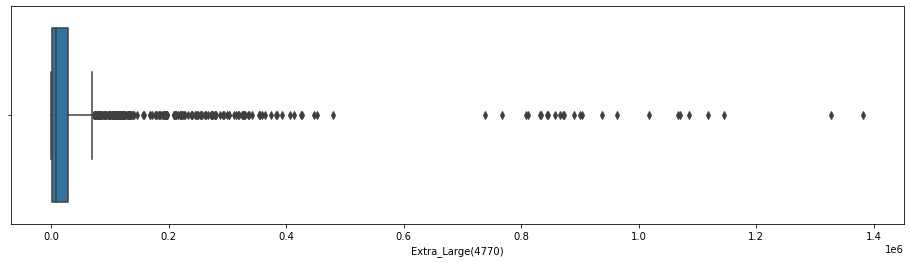

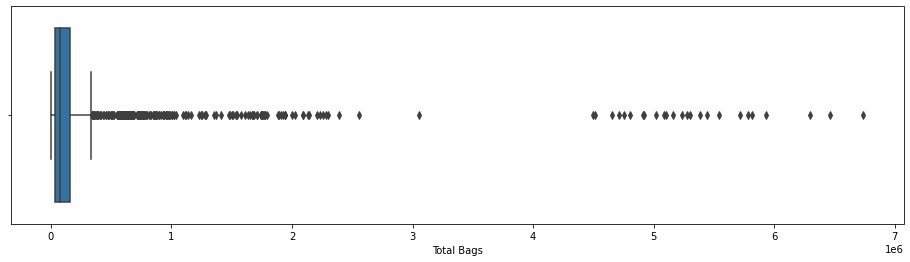

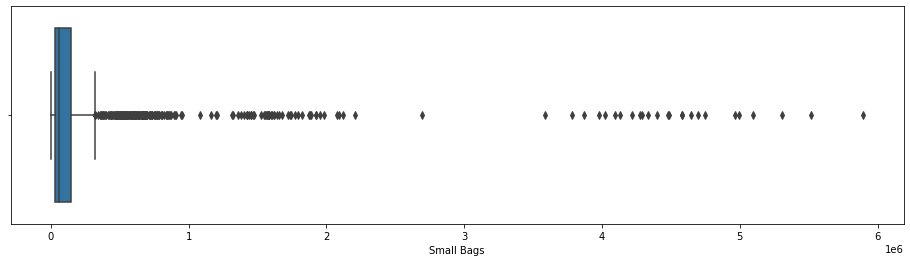

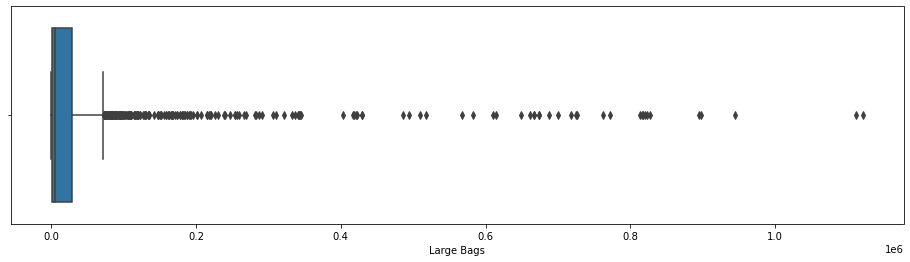

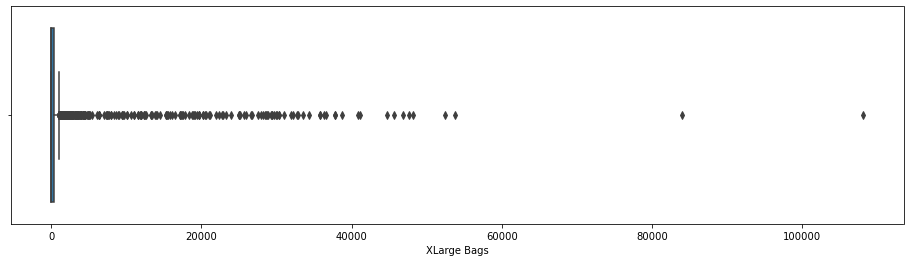

In [253]:
# box plot of each of the feautre

for col in num_var:
    fig_this_size(16,4)
    sns.boxplot(df[col])

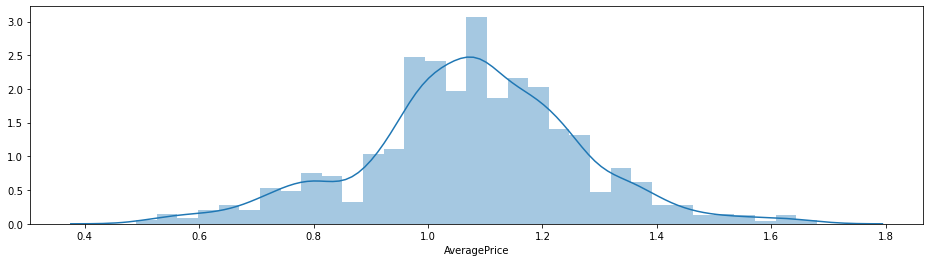

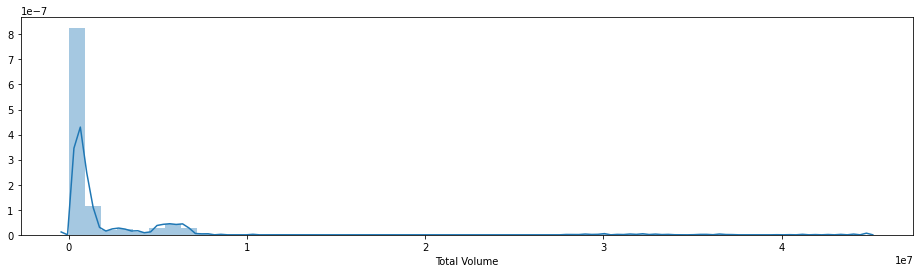

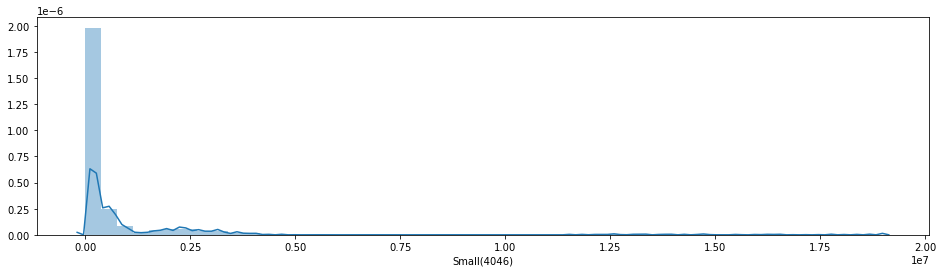

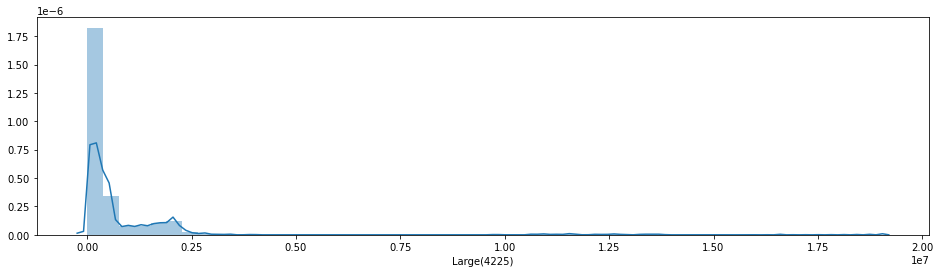

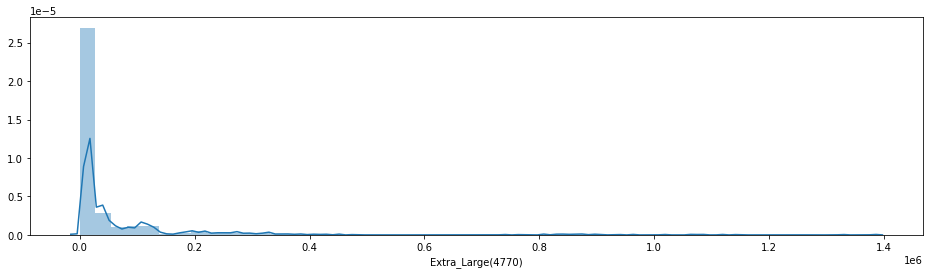

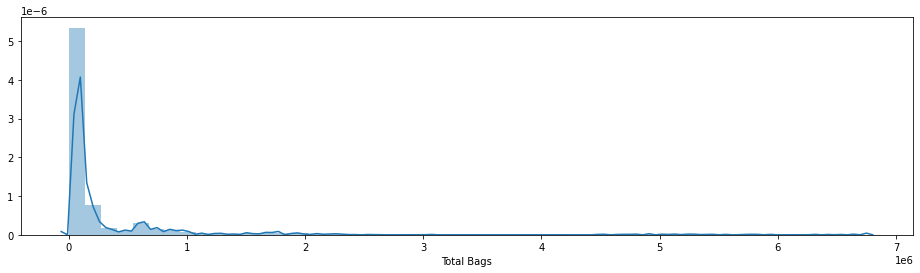

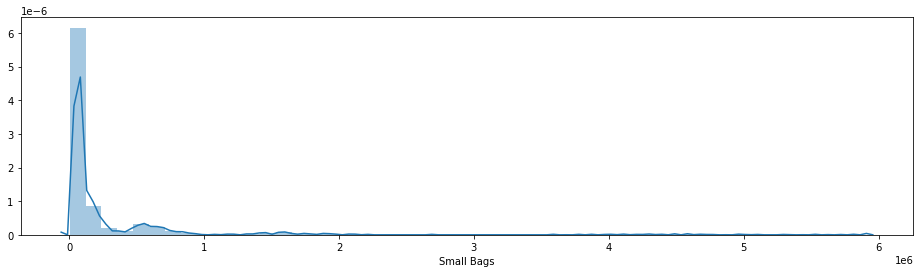

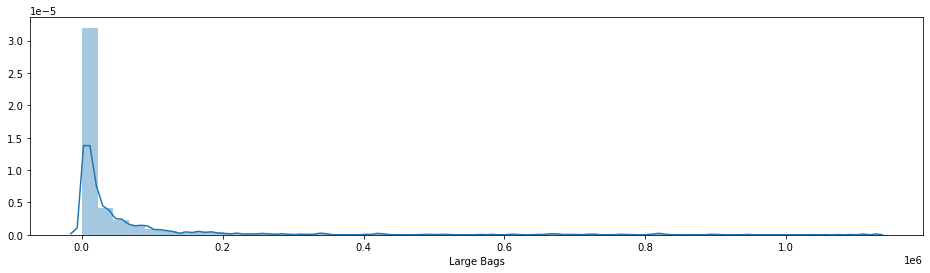

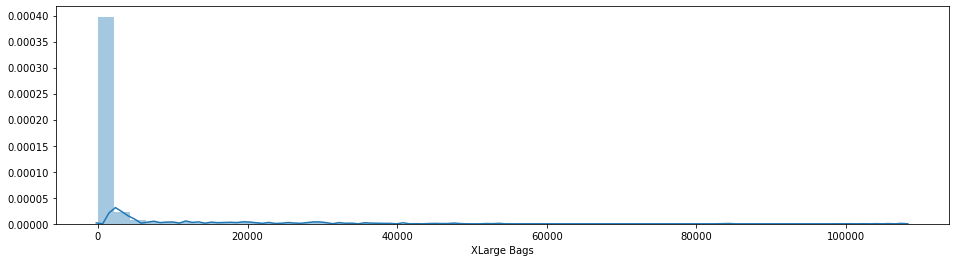

In [254]:
# distplot of each of the feautre

for col in num_var:
    fig_this_size(16,4)
    sns.distplot(df[col])

All the feautres except the Average Price are very highly skewed

In [255]:
df.skew()

AveragePrice        -0.109444
Total Volume         6.200138
Small(4046)          6.051830
Large(4225)          6.394926
Extra_Large(4770)    5.405164
Total Bags           5.366378
Small Bags           5.355185
Large Bags           5.144495
XLarge Bags          5.775077
year                 1.828332
dtype: float64

In [256]:
# let's remove the outliers using the z-score method

In [257]:
z_scores = stats.zscore(df[num_var])

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_cleaned = df[filtered_entries]

In [258]:
len(df_cleaned)

1436

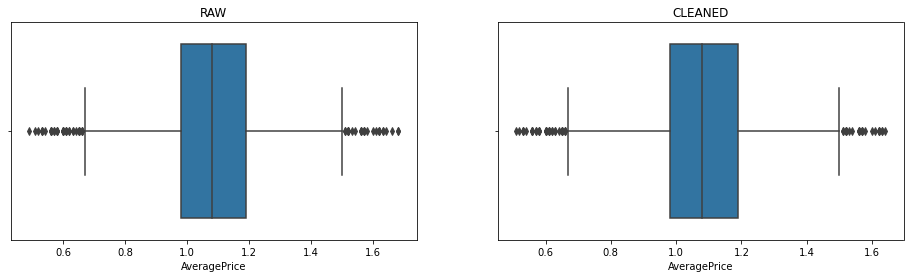

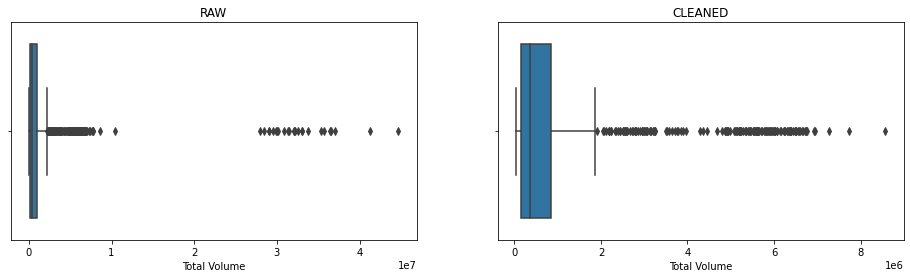

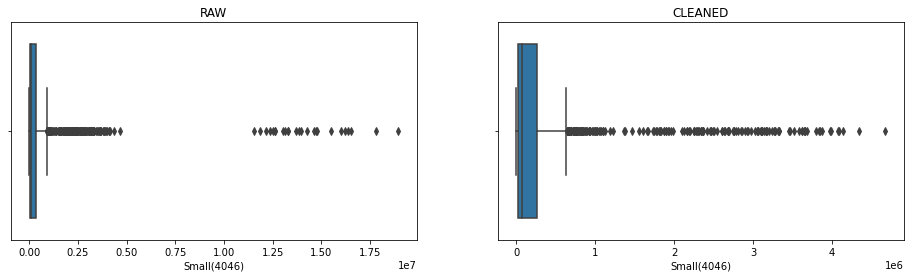

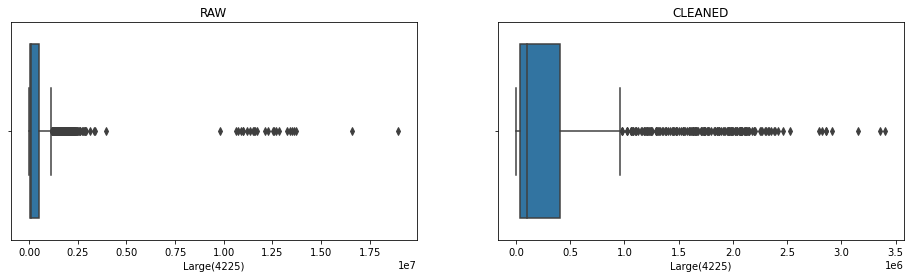

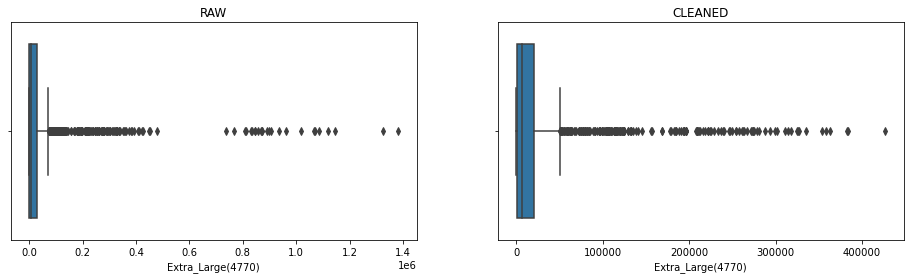

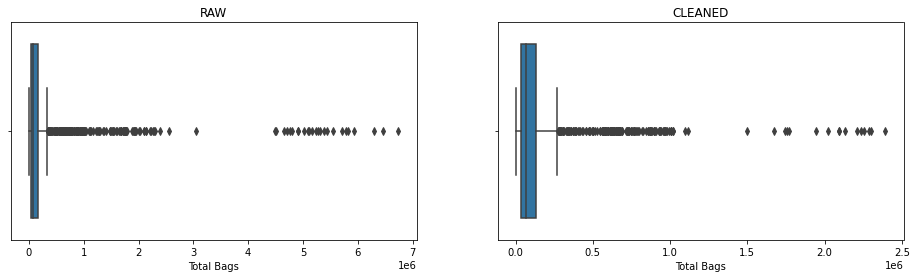

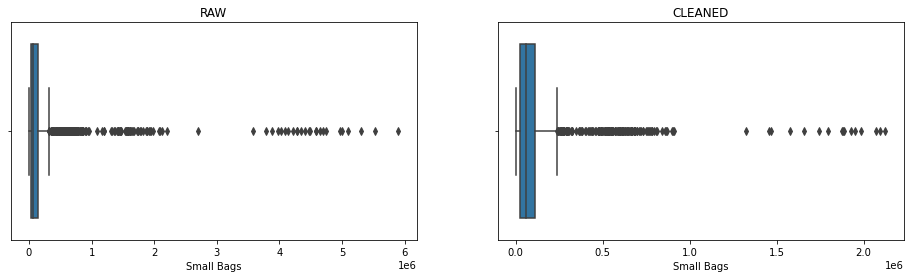

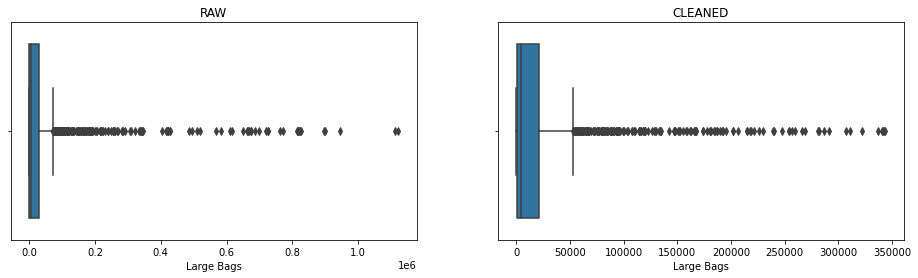

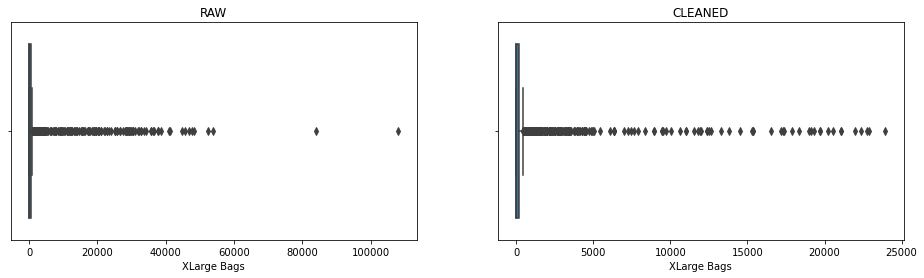

In [259]:
# before and after removing the outliers.


for col in num_var:
    fig = fig_this_size(16,4)
    
    fig.add_subplot(121)
    sns.boxplot(df[col])
    plt.title('RAW')
    
    fig.add_subplot(122)
    sns.boxplot(df_cleaned[col])
    plt.title('CLEANED')

In [260]:
# Removing outliers didn't do s much good.

In [261]:
# let's try skew transformation on the knw cleaned dataset.

In [262]:
df_cleaned.skew()

AveragePrice        -0.184770
Total Volume         2.704085
Small(4046)          3.120756
Large(4225)          2.367429
Extra_Large(4770)    3.331191
Total Bags           4.165747
Small Bags           4.410267
Large Bags           3.518056
XLarge Bags          5.118965
year                 2.004439
dtype: float64

* The skew go way better just after removeing some outliers

In [263]:
# try1 : log transformation
np.log(df_cleaned[num_var]+1).skew()

AveragePrice        -0.519286
Total Volume         0.462899
Small(4046)         -0.270283
Large(4225)          0.011359
Extra_Large(4770)   -0.449713
Total Bags           0.378673
Small Bags           0.420856
Large Bags          -0.979047
XLarge Bags          0.851740
dtype: float64

* log transformation works magic!

In [264]:
# try2 :sqrt transformation
np.sqrt(df_cleaned[num_var]).skew()

AveragePrice        -0.521581
Total Volume         1.784245
Small(4046)          1.882842
Large(4225)          1.380059
Extra_Large(4770)    1.773953
Total Bags           2.166782
Small Bags           2.179872
Large Bags           1.696494
XLarge Bags          2.826879
dtype: float64

In [265]:
# let's finalize the log transformation

In [266]:
df_cleaned[num_var] = np.log(df_cleaned[num_var]+1)

In [267]:
df_cleaned.skew()

AveragePrice        -0.519286
Total Volume         0.462899
Small(4046)         -0.270283
Large(4225)          0.011359
Extra_Large(4770)   -0.449713
Total Bags           0.378673
Small Bags           0.420856
Large Bags          -0.979047
XLarge Bags          0.851740
year                 2.004439
dtype: float64

* The feaure year is actually not a real values but a categorical value, so we get its knew between -1 to 1.

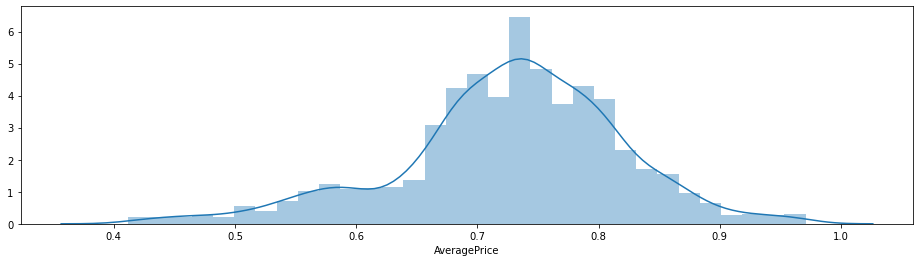

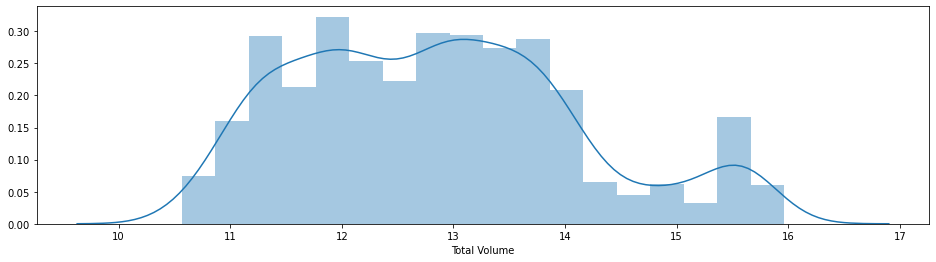

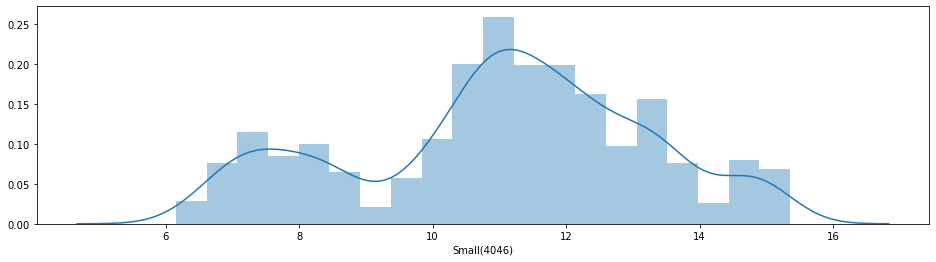

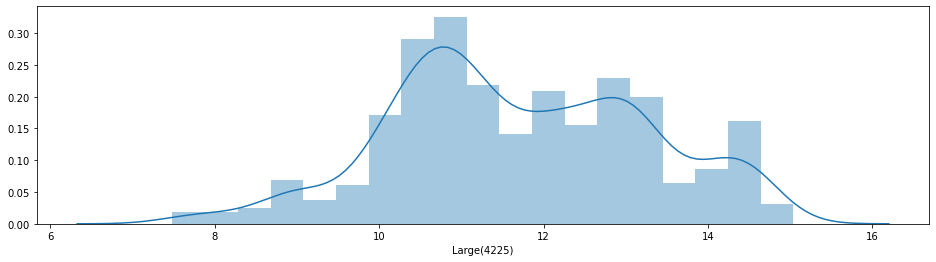

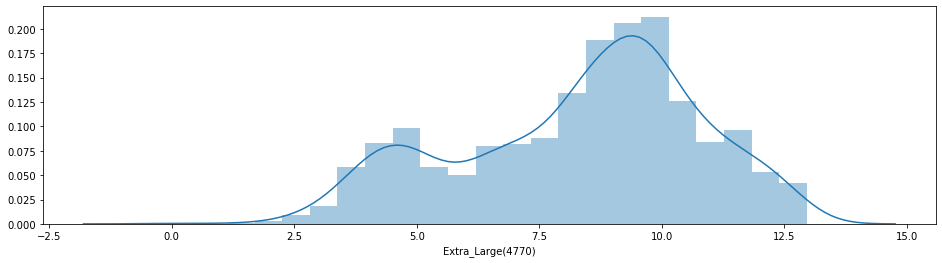

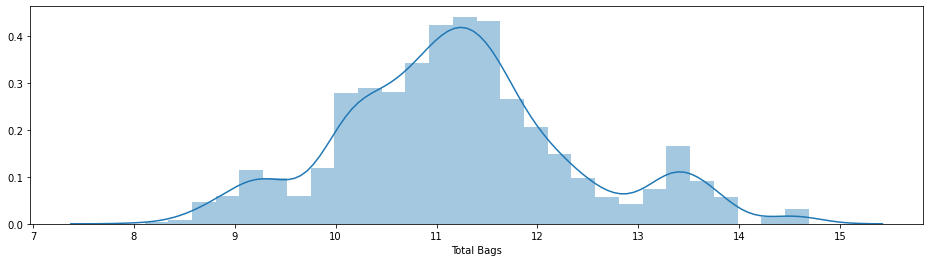

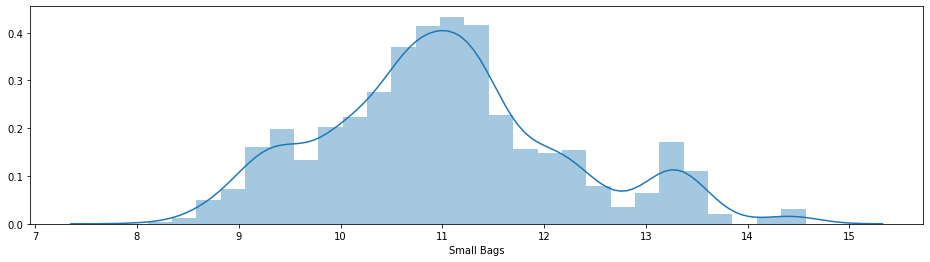

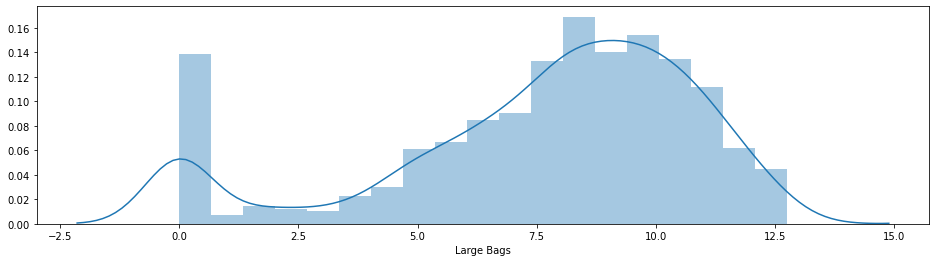

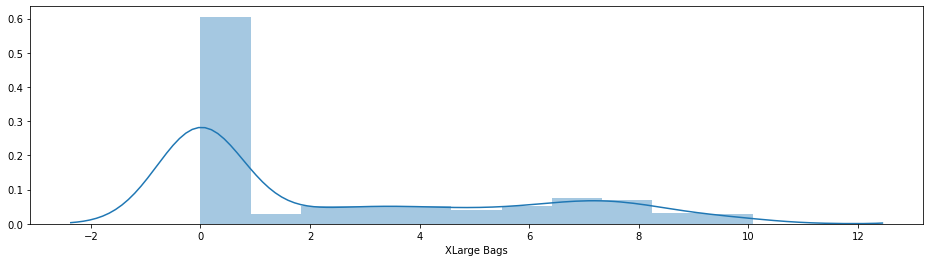

In [268]:
for col in num_var:
    fig_this_size(16,4)
    sns.distplot(df_cleaned[col])

* the distributions look more acceptable now than than the original dataset.

In [269]:
df_cleaned

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
845,2015-01-04,0.698135,14.336562,13.842973,13.053318,9.257023,12.094224,12.085944,6.090337,6.942369,conventional,2015,Plains,January
51,2015-01-04,0.797507,10.618256,7.944669,10.250208,3.929863,9.181680,9.125646,6.273877,0.000000,conventional,2015,Albany,January
1269,2015-01-04,0.559616,13.538597,12.964258,11.904693,9.633573,12.031807,12.014932,7.941843,0.000000,conventional,2015,WestTexNewMexico,January
1147,2015-01-04,0.845868,10.624846,7.827085,9.947792,2.872434,9.782235,9.782235,0.000000,0.000000,conventional,2015,Syracuse,January
811,2015-01-04,0.500775,13.862454,13.554972,12.091892,8.781158,11.434965,11.434965,0.000000,0.000000,conventional,2015,PhoenixTucson,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,2016-12-25,0.708036,11.172826,10.220676,7.970271,8.807201,10.437987,10.417819,6.497107,3.008155,conventional,2016,Boise,December
1364,2016-12-25,0.824175,13.011659,8.378076,12.755688,8.339188,11.435527,11.423904,6.975900,0.000000,conventional,2016,Boston,December
1408,2016-12-25,0.879627,11.542838,7.088684,11.073421,3.763291,10.528421,10.482969,7.415296,0.000000,conventional,2016,BuffaloRochester,December
1502,2016-12-25,0.810930,11.956290,10.494784,10.835523,8.899136,11.027627,10.844450,9.233469,4.254761,conventional,2016,Charlotte,December


In [270]:
# check the correation of the cleaned dataset

In [271]:
df_cleaned.corr()

,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.354877,-0.542373,-0.119964,-0.280329,-0.194166,-0.148265,-0.199845,-0.048385,0.155900
Total Volume,-0.354877,1.000000,0.714443,0.861367,0.562389,0.916026,0.897252,0.524451,0.267479,-0.081343
Small(4046),-0.542373,0.714443,1.000000,0.338558,0.511887,0.569921,0.524766,0.457328,0.181402,-0.209605
Large(4225),-0.119964,0.861367,0.338558,1.000000,0.464000,0.801631,0.811968,0.369371,0.232137,-0.064272
Extra_Large(4770),-0.280329,0.562389,0.511887,0.464000,1.000000,0.488409,0.506071,0.277250,0.481333,-0.054820
Total Bags,-0.194166,0.916026,0.569921,0.801631,0.488409,1.000000,0.979557,0.533404,0.329304,0.067249
Small Bags,-0.148265,0.897252,0.524766,0.811968,0.506071,0.979557,1.000000,0.414829,0.315655,0.100334
Large Bags,-0.199845,0.524451,0.457328,0.369371,0.277250,0.533404,0.414829,1.000000,0.173746,-0.172881
XLarge Bags,-0.048385,0.267479,0.181402,0.232137,0.481333,0.329304,0.315655,0.173746,1.000000,0.102369
year,0.155900,-0.081343,-0.209605,-0.064272,-0.054820,0.067249,0.100334,-0.172881,0.102369,1.000000


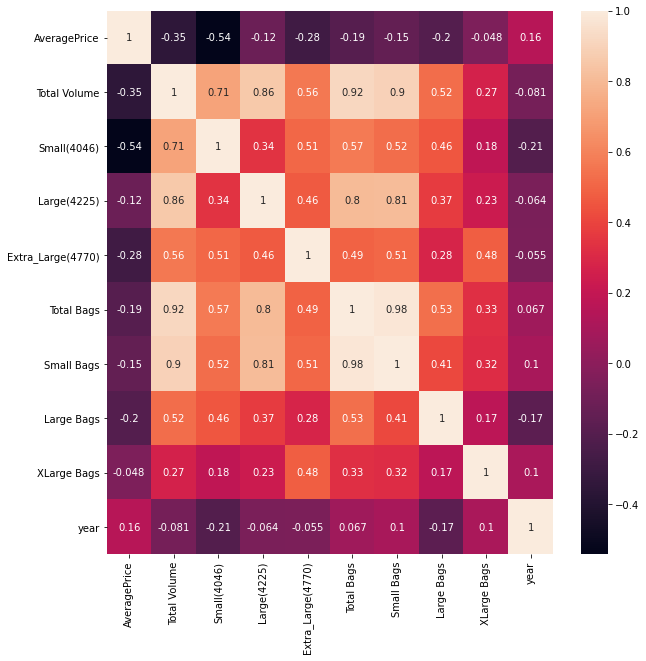

In [272]:
# plot the correlation
fig_this_size(10,10)
sns.heatmap(df_cleaned.corr(),annot=True)

* Total Bags is highly corrlated to Samll bags we hav to remove one of the feature.
* Rest of the feautres look fine.

In [273]:
df_cleaned.head()

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
845,2015-01-04,0.698135,14.336562,13.842973,13.053318,9.257023,12.094224,12.085944,6.090337,6.942369,conventional,2015,Plains,January
51,2015-01-04,0.797507,10.618256,7.944669,10.250208,3.929863,9.181680,9.125646,6.273877,0.000000,conventional,2015,Albany,January
1269,2015-01-04,0.559616,13.538597,12.964258,11.904693,9.633573,12.031807,12.014932,7.941843,0.000000,conventional,2015,WestTexNewMexico,January
1147,2015-01-04,0.845868,10.624846,7.827085,9.947792,2.872434,9.782235,9.782235,0.000000,0.000000,conventional,2015,Syracuse,January
811,2015-01-04,0.500775,13.862454,13.554972,12.091892,8.781158,11.434965,11.434965,0.000000,0.000000,conventional,2015,PhoenixTucson,January


In [274]:
(df_cleaned[df_cleaned['XLarge Bags']!=0]['Extra_Large(4770)']-df_cleaned[df_cleaned['XLarge Bags']!=0]['XLarge Bags'])

845     2.314653
546     3.080097
334     7.002993
982     7.114541
545     2.923828
          ...   
1271    1.219262
1325    6.862729
1324    5.799046
1502    4.644375
1270    4.687756
Length: 640, dtype: float64

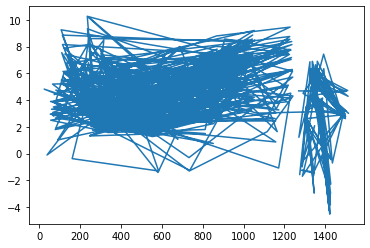

In [275]:
(df_cleaned[df_cleaned['XLarge Bags']!=0]['Extra_Large(4770)']-df_cleaned[df_cleaned['XLarge Bags']!=0]['XLarge Bags']).plot()

* The is no significant relationship between Total avocado solds vs total bags for a Hass with a particular PLU.
* Moreover, the 0's in XLarge bags are valid

In [276]:
# create 2 different dataframes , 1 For regression and Other for Classification

In [343]:
df_reg = df_cleaned.copy()
df_class = df_cleaned.copy()

## Regression

In [287]:
df_reg.head()

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
845,2015-01-04,0.698135,14.336562,13.842973,13.053318,9.257023,12.094224,12.085944,6.090337,6.942369,conventional,2015,Plains,January
51,2015-01-04,0.797507,10.618256,7.944669,10.250208,3.929863,9.181680,9.125646,6.273877,0.000000,conventional,2015,Albany,January
1269,2015-01-04,0.559616,13.538597,12.964258,11.904693,9.633573,12.031807,12.014932,7.941843,0.000000,conventional,2015,WestTexNewMexico,January
1147,2015-01-04,0.845868,10.624846,7.827085,9.947792,2.872434,9.782235,9.782235,0.000000,0.000000,conventional,2015,Syracuse,January
811,2015-01-04,0.500775,13.862454,13.554972,12.091892,8.781158,11.434965,11.434965,0.000000,0.000000,conventional,2015,PhoenixTucson,January


In [288]:
# removing the redudant columns
df_reg = df_reg.drop(['Date','Total Bags','type'],1)

In [289]:
df_reg

,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Small Bags,Large Bags,XLarge Bags,year,region,month
845,0.698135,14.336562,13.842973,13.053318,9.257023,12.085944,6.090337,6.942369,2015,Plains,January
51,0.797507,10.618256,7.944669,10.250208,3.929863,9.125646,6.273877,0.000000,2015,Albany,January
1269,0.559616,13.538597,12.964258,11.904693,9.633573,12.014932,7.941843,0.000000,2015,WestTexNewMexico,January
1147,0.845868,10.624846,7.827085,9.947792,2.872434,9.782235,0.000000,0.000000,2015,Syracuse,January
811,0.500775,13.862454,13.554972,12.091892,8.781158,11.434965,0.000000,0.000000,2015,PhoenixTucson,January
...,...,...,...,...,...,...,...,...,...,...,...
1324,0.708036,11.172826,10.220676,7.970271,8.807201,10.417819,6.497107,3.008155,2016,Boise,December
1364,0.824175,13.011659,8.378076,12.755688,8.339188,11.423904,6.975900,0.000000,2016,Boston,December
1408,0.879627,11.542838,7.088684,11.073421,3.763291,10.482969,7.415296,0.000000,2016,BuffaloRochester,December
1502,0.810930,11.956290,10.494784,10.835523,8.899136,10.844450,9.233469,4.254761,2016,Charlotte,December


In [290]:
# one hat encoding 
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
one_hot_enc = OneHotCategoricalEncoder(variables=['region','month'],drop_last=True)

In [291]:
df_reg = one_hot_enc.fit_transform(df_reg)

In [292]:
df_reg

,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Small Bags,Large Bags,XLarge Bags,year,region_Plains,...,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November
845,0.698135,14.336562,13.842973,13.053318,9.257023,12.085944,6.090337,6.942369,2015,1,...,0,0,0,0,0,0,0,0,0,0
51,0.797507,10.618256,7.944669,10.250208,3.929863,9.125646,6.273877,0.000000,2015,0,...,0,0,0,0,0,0,0,0,0,0
1269,0.559616,13.538597,12.964258,11.904693,9.633573,12.014932,7.941843,0.000000,2015,0,...,0,0,0,0,0,0,0,0,0,0
1147,0.845868,10.624846,7.827085,9.947792,2.872434,9.782235,0.000000,0.000000,2015,0,...,0,0,0,0,0,0,0,0,0,0
811,0.500775,13.862454,13.554972,12.091892,8.781158,11.434965,0.000000,0.000000,2015,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,0.708036,11.172826,10.220676,7.970271,8.807201,10.417819,6.497107,3.008155,2016,0,...,0,0,0,0,0,0,0,0,0,0
1364,0.824175,13.011659,8.378076,12.755688,8.339188,11.423904,6.975900,0.000000,2016,0,...,0,0,0,0,0,0,0,0,0,0
1408,0.879627,11.542838,7.088684,11.073421,3.763291,10.482969,7.415296,0.000000,2016,0,...,0,0,0,0,0,0,0,0,0,0
1502,0.810930,11.956290,10.494784,10.835523,8.899136,10.844450,9.233469,4.254761,2016,0,...,0,0,0,0,0,0,0,0,0,0


In [293]:
# Splitting the dataset into X and y.
X = df_reg.drop(['AveragePrice'],1)
y = df_reg['AveragePrice']

In [294]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [295]:
# check the shape
from sklearn.model_selection import train_test_split

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((962, 68), (474, 68), (962,), (474,))

In [296]:
# feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [297]:
ct_X_train = ColumnTransformer(transformers=[('sclar',StandardScaler(),X_train.columns[:8])],remainder='passthrough')

ct_X_test = ColumnTransformer(transformers=[('sclar1',StandardScaler(),X_test.columns[:8])],remainder='passthrough')


In [298]:
# scaling the training data
X_train.iloc[:,:8] = ct_X_train.fit_transform(X_train.iloc[:,:8])

In [299]:
X_test.iloc[:,:8] = ct_X_test.fit_transform(X_test.iloc[:,:8])

In [300]:
X_train

,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Small Bags,Large Bags,XLarge Bags,year,region_Plains,region_Albany,...,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November
868,0.086077,0.494747,0.208423,0.583187,0.042656,-0.769855,-0.765366,-0.424698,0,0,...,0,0,0,0,0,1,0,0,0,0
1378,0.212377,-0.697676,0.651591,0.400884,0.651317,-1.475812,1.753912,2.354616,0,0,...,0,0,0,0,0,1,0,0,0,0
791,0.930531,1.265221,0.241540,0.157287,0.244370,0.705178,-0.765366,-0.424698,0,0,...,0,0,0,1,0,0,0,0,0,0
865,0.142204,0.499279,0.276782,0.536827,0.187153,-0.873025,-0.259605,-0.424698,0,0,...,0,0,0,0,0,0,1,0,0,0
924,-0.889328,-0.072510,-0.621209,-1.489728,-0.667732,-1.384669,-0.335539,-0.424698,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,-0.353825,0.171798,-0.795883,1.035915,0.031362,-0.151651,1.949605,-0.424698,0,0,...,0,0,0,0,0,0,0,0,0,1
701,-0.452724,-1.385678,0.246112,-1.548855,-0.493914,-2.202148,-0.765366,-0.424698,0,0,...,0,0,0,0,0,0,0,0,0,1
1311,0.551683,-0.004721,0.919519,0.535839,0.872380,0.143006,-0.765366,2.354616,0,0,...,0,1,0,0,0,0,0,0,0,0
715,0.021718,-1.455366,0.640928,-0.771324,-0.055260,-2.202148,-0.765366,-0.424698,0,0,...,0,0,0,0,0,0,1,0,0,0


In [301]:
# fitting the data(training the model)
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [302]:
# importing the evaluation metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [303]:
# helper funciton
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    print('Train_Acc:', model.score(X_test,y_test))
    print('Test_Acc:', model.score(X_test,y_test))
    print('R2:', r2_score(y_test,model.predict(X_test)))
    print('MSE:',mean_squared_error(y_test,model.predict(X_test)))

In [304]:
# try1: Linear Regression
train_n_ret_scores(LinearRegression())

Train_Acc: 0.8032127525611317
Test_Acc: 0.8032127525611317
R2: 0.8032127525611317
MSE: 0.0016336709917276688


In [305]:
# try2: Ridge Regressor
train_n_ret_scores(Ridge(alpha=0.001))

Train_Acc: 0.8033302754062833
Test_Acc: 0.8033302754062833
R2: 0.8033302754062833
MSE: 0.0016326953509506958


In [306]:
# try3: Lasso
train_n_ret_scores(Lasso(alpha=0.00001))

Train_Acc: 0.8054714484161625
Test_Acc: 0.8054714484161625
R2: 0.8054714484161625
MSE: 0.00161491994995274


In [307]:
# try4: Elastic
train_n_ret_scores(ElasticNet(alpha=0.00001))

Train_Acc: 0.8052283556489853
Test_Acc: 0.8052283556489853
R2: 0.8052283556489853
MSE: 0.0016169380360188076


In [308]:
# TRY5 : knn
train_n_ret_scores(KNeighborsRegressor(n_jobs=5))

Train_Acc: 0.7989360359907159
Test_Acc: 0.7989360359907159
R2: 0.7989360359907159
MSE: 0.0016691750596581865


In [309]:
# try6: Decision tree
train_n_ret_scores(DecisionTreeRegressor())

Train_Acc: 0.6896261119536301
Test_Acc: 0.6896261119536301
R2: 0.6896261119536301
MSE: 0.0025766345334374344


In [310]:
# try7 : Random Forest
train_n_ret_scores(RandomForestRegressor(n_estimators=200))

Train_Acc: 0.827710476032764
Test_Acc: 0.827710476032764
R2: 0.827710476032764
MSE: 0.001430297954501745


In [311]:
# try5 : Gradient Boosting
train_n_ret_scores(GradientBoostingRegressor(n_estimators=200))

Train_Acc: 0.8079919303204502
Test_Acc: 0.8079919303204502
R2: 0.8079919303204502
MSE: 0.0015939956358734522


In [312]:
# ada boost with radom forest
train_n_ret_scores(AdaBoostRegressor(base_estimator=RandomForestRegressor()))

Train_Acc: 0.8518914231043017
Test_Acc: 0.8518914231043017
R2: 0.8518914231043017
MSE: 0.0012295547036183525


In [313]:
# adaboost with linear
train_n_ret_scores(AdaBoostRegressor(base_estimator=LinearRegression()))

Train_Acc: 0.6784399692749098
Test_Acc: 0.6784399692749098
R2: 0.6784399692749098
MSE: 0.002669498664835121


In [314]:
# adaboost with DT
train_n_ret_scores(AdaBoostRegressor(base_estimator=DecisionTreeRegressor()))

Train_Acc: 0.8402994747312118
Test_Acc: 0.8402994747312118
R2: 0.8402994747312118
MSE: 0.0013257877168912499


In [315]:
# SVR
train_n_ret_scores(SVR(kernel='rbf',C=100))

Train_Acc: 0.6014444510893014
Test_Acc: 0.6014444510893014
R2: 0.6014444510893014
MSE: 0.0033086932579295923


In [316]:
# chossing the best model


models = [LinearRegression(),Ridge(),Lasso(),ElasticNet(),SVR(),KNeighborsRegressor(n_neighbors=5),DecisionTreeRegressor(),RandomForestRegressor(n_estimators=200),GradientBoostingRegressor(n_estimators=150),AdaBoostRegressor(base_estimator=RandomForestRegressor(n_estimators=200))]
model_names = 'Linear_reg Ridge SVR  Lasso ElasticNet KNN Random_forest Decision_Treee Gradient_boost Adaboost'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','R2','MSE','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    r2 = r2_score(y_test,y_preds)
    mse = mean_squared_error(y_test,y_preds)
    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'R2':r2,'MSE':mse,'Avg_CV':avg_cv},ignore_index=True)

Linear_reg
Ridge
SVR
Lasso
ElasticNet
KNN
Random_forest
Decision_Treee
Gradient_boost
Adaboost


In [317]:
models_df

,Algo,Train_acc,Test_acc,R2,MSE,Avg_CV
0,Linear_reg,0.858910,0.803213,0.803213,0.001634,0.833896
1,Ridge,0.806416,0.752230,0.752230,0.002057,0.764446
2,SVR,0.000000,-0.000005,-0.000005,0.008302,-0.002530
3,Lasso,0.000000,-0.000005,-0.000005,0.008302,-0.002530
4,ElasticNet,0.635906,0.601444,0.601444,0.003309,0.570794
5,KNN,0.856496,0.798936,0.798936,0.001669,0.768681
6,Random_forest,1.000000,0.703660,0.703660,0.002460,0.637379
7,Decision_Treee,0.977661,0.829319,0.829319,0.001417,0.813375
8,Gradient_boost,0.892998,0.795400,0.795400,0.001699,0.787485
9,Adaboost,0.989708,0.851548,0.851548,0.001232,0.841910


In [ ]:
# So adamoost is gingin us the best results.

* We will finalize the Adamoost as the best model, but before that let's apply grid search cv on the RandomForest and train that model as the base estimator for adaboost

In [318]:
# hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

In [319]:
param_dict = {
 'max_depth': [10, 30, 50, 70, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100.,200, 400, 600]}

In [320]:
# fitting the model
gs_model = GridSearchCV(RandomForestRegressor(),param_grid=param_dict,cv=5,verbose=3)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100.0 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100.0, score=nan, total=   0.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100.0 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100.0, score=nan, total=   0.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100.0 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100.0, score=nan, total=   0.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100.0 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100.0, score=nan, total=   0.0s
[CV] max_depth=10, max_features=auto, mi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.809, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.774, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.852, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.805, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.743, t

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.790, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.759, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.834, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.787, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.797, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.778, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.845, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.802, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.731, t

[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.788, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.765, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.820, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.795, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.704, t

[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.782, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.759, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.824, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.779, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.754, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.731, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.794, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.755, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.702, t

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.733, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.724, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.774, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.734, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.650, t

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.726, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.708, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.765, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.725, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.696, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.694, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.738, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.701, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.603, t

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.830, total=   1.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.797, total=   1.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.865, total=   1.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.829, total=   1.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.747, t

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.805, total=   1.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.766, total=   1.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.842, total=   1.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.806, total=   1.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.816, total=   1.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.786, total=   1.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.852, total=   1.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.815, total=   1.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.738, t

[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.797, total=   0.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.769, total=   0.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.835, total=   0.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.804, total=   0.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.705, t

[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.790, total=   0.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.767, total=   0.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.827, total=   0.9s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.798, total=   1.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.815, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.791, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.845, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.825, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.766, t

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.800, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.767, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.823, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.797, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.711, t

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.775, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.743, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.804, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.774, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.730, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.711, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.766, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.746, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.629, t

[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.830, total=   1.2s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.791, total=   1.2s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.861, total=   1.2s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.827, total=   1.3s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.774, t

[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.807, total=   1.0s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.773, total=   1.0s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.847, total=   1.1s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.794, total=   1.4s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score

[CV]  max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.815, total=   1.0s
[CV] max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.786, total=   1.0s
[CV] max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.854, total=   1.1s
[CV] max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.816, total=   1.1s
[CV] max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.739, t

[CV]  max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.793, total=   0.9s
[CV] max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.771, total=   0.9s
[CV] max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.830, total=   0.9s
[CV] max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.799, total=   0.9s
[CV] max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.716, t

[CV]  max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.787, total=   1.0s
[CV] max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.774, total=   1.0s
[CV] max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.824, total=   0.9s
[CV] max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.793, total=   0.9s
[CV] max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score

[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.823, total=   0.5s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.790, total=   0.5s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.848, total=   0.5s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.827, total=   0.5s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.765, t

[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.796, total=   0.5s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.771, total=   0.5s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.822, total=   0.5s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.801, total=   0.5s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.721, t

[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.772, total=   0.4s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.744, total=   0.4s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.807, total=   0.4s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.772, total=   0.4s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score

[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.742, total=   0.4s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.723, total=   0.5s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.768, total=   0.5s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.740, total=   0.6s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.638, t

[CV]  max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.831, total=   1.3s
[CV] max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.793, total=   1.3s
[CV] max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.860, total=   1.2s
[CV] max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.824, total=   1.3s
[CV] max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.768, t

[CV]  max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.813, total=   1.0s
[CV] max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.774, total=   1.0s
[CV] max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.850, total=   1.0s
[CV] max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.801, total=   1.0s
[CV] max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score

[CV]  max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.815, total=   1.1s
[CV] max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.785, total=   1.1s
[CV] max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.855, total=   1.2s
[CV] max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.819, total=   1.2s
[CV] max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.728, t

[CV]  max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.798, total=   1.0s
[CV] max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.775, total=   1.0s
[CV] max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.831, total=   1.0s
[CV] max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.798, total=   1.0s
[CV] max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.723, t

[CV]  max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.790, total=   0.9s
[CV] max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.764, total=   0.9s
[CV] max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.823, total=   1.0s
[CV] max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.795, total=   1.0s
[CV] max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score

[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.825, total=   0.5s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.786, total=   0.5s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.850, total=   0.5s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.822, total=   0.5s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.754, t

[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.796, total=   0.5s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.771, total=   0.5s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.828, total=   0.5s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.799, total=   0.5s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.714, t

[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.775, total=   0.4s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.746, total=   0.4s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.804, total=   0.4s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.772, total=   0.4s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score

[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.733, total=   0.4s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.714, total=   0.5s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.776, total=   0.4s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.742, total=   0.4s
[CV] max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.634, t

[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.831, total=   1.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.789, total=   1.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.863, total=   1.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.824, total=   1.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2

[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.815, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.775, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.848, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.800, total=   1.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_est

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.815, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.783, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.854, total=   1.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.817, total=   1.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2

[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.799, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.771, total=   0.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.829, total=   0.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.802, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2

[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.786, total=   1.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.770, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.829, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.795, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_est

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.826, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.792, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.844, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.826, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.795, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.772, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.823, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.797, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.773, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.748, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.806, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.771, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_est

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.740, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.712, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.763, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.745, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=2

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed: 33.2min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 30, 50, 70, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100.0, 200, 400, 600]},
             verbose=3)

In [321]:
gs_model.best_estimator_

RandomForestRegressor(max_depth=50, max_features='sqrt', n_estimators=600)

In [322]:
gs_model.best_score_

0.8255586030878617

In [325]:
gs_model.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

In [326]:
gs_model.cv_results_

{'mean_fit_time': array([4.80027199e-03, 1.02485857e+00, 1.98351336e+00, 2.88156486e+00,
        4.40025330e-03, 8.92651033e-01, 1.81990414e+00, 2.78835940e+00,
        4.00023460e-03, 9.12452221e-01, 1.76730108e+00, 2.60474901e+00,
        8.00051689e-03, 9.70055532e-01, 1.85070577e+00, 2.77815895e+00,
        4.20022011e-03, 9.29653120e-01, 1.84230547e+00, 2.85276313e+00,
        4.40015793e-03, 9.04851818e-01, 1.76730108e+00, 2.69155393e+00,
        5.00025749e-03, 8.77650309e-01, 1.71429820e+00, 2.50314317e+00,
        3.40018272e-03, 8.37247801e-01, 1.69269676e+00, 2.58974814e+00,
        3.80020142e-03, 8.49248600e-01, 1.75070009e+00, 2.61814976e+00,
        4.60028648e-03, 4.06823301e-01, 8.31647539e-01, 1.26547236e+00,
        4.00032997e-03, 3.86622143e-01, 7.86844873e-01, 1.16186638e+00,
        4.20022011e-03, 4.01623011e-01, 7.55243254e-01, 1.15146589e+00,
        4.00018692e-03, 3.85421944e-01, 7.91845369e-01, 1.13246484e+00,
        3.60016823e-03, 3.76021481e-01, 8.14246

In [328]:
gs_model.score(X_train,y_train)

0.9791773737457776

In [329]:
gs_model.score(X_test,y_test)

0.8352930122121078

In [330]:
# Saving the best regression model
import joblib 
joblib.dump(gs_model,'price_model_reg.pkl')

['price_model_reg.pkl']

## Classification

In [332]:
df_class

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
845,2015-01-04,0.698135,14.336562,13.842973,13.053318,9.257023,12.094224,12.085944,6.090337,6.942369,conventional,2015,Plains,January
51,2015-01-04,0.797507,10.618256,7.944669,10.250208,3.929863,9.181680,9.125646,6.273877,0.000000,conventional,2015,Albany,January
1269,2015-01-04,0.559616,13.538597,12.964258,11.904693,9.633573,12.031807,12.014932,7.941843,0.000000,conventional,2015,WestTexNewMexico,January
1147,2015-01-04,0.845868,10.624846,7.827085,9.947792,2.872434,9.782235,9.782235,0.000000,0.000000,conventional,2015,Syracuse,January
811,2015-01-04,0.500775,13.862454,13.554972,12.091892,8.781158,11.434965,11.434965,0.000000,0.000000,conventional,2015,PhoenixTucson,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,2016-12-25,0.708036,11.172826,10.220676,7.970271,8.807201,10.437987,10.417819,6.497107,3.008155,conventional,2016,Boise,December
1364,2016-12-25,0.824175,13.011659,8.378076,12.755688,8.339188,11.435527,11.423904,6.975900,0.000000,conventional,2016,Boston,December
1408,2016-12-25,0.879627,11.542838,7.088684,11.073421,3.763291,10.528421,10.482969,7.415296,0.000000,conventional,2016,BuffaloRochester,December
1502,2016-12-25,0.810930,11.956290,10.494784,10.835523,8.899136,11.027627,10.844450,9.233469,4.254761,conventional,2016,Charlotte,December


In [333]:
# Since we have to classify and predcit the region variable,we have to label encode the regions variable.
# Note that there are 51 regions in the dataset,so there will be 51 target classes

In [344]:
# label encoder
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder
le = OrdinalCategoricalEncoder(encoding_method='arbitrary',variables=['region'])


In [345]:
df_class = le.fit_transform(df_class)

In [347]:
df_class

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
845,2015-01-04,0.698135,14.336562,13.842973,13.053318,9.257023,12.094224,12.085944,6.090337,6.942369,conventional,2015,0,January
51,2015-01-04,0.797507,10.618256,7.944669,10.250208,3.929863,9.181680,9.125646,6.273877,0.000000,conventional,2015,1,January
1269,2015-01-04,0.559616,13.538597,12.964258,11.904693,9.633573,12.031807,12.014932,7.941843,0.000000,conventional,2015,2,January
1147,2015-01-04,0.845868,10.624846,7.827085,9.947792,2.872434,9.782235,9.782235,0.000000,0.000000,conventional,2015,3,January
811,2015-01-04,0.500775,13.862454,13.554972,12.091892,8.781158,11.434965,11.434965,0.000000,0.000000,conventional,2015,4,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,2016-12-25,0.708036,11.172826,10.220676,7.970271,8.807201,10.437987,10.417819,6.497107,3.008155,conventional,2016,30,December
1364,2016-12-25,0.824175,13.011659,8.378076,12.755688,8.339188,11.435527,11.423904,6.975900,0.000000,conventional,2016,10,December
1408,2016-12-25,0.879627,11.542838,7.088684,11.073421,3.763291,10.528421,10.482969,7.415296,0.000000,conventional,2016,48,December
1502,2016-12-25,0.810930,11.956290,10.494784,10.835523,8.899136,11.027627,10.844450,9.233469,4.254761,conventional,2016,28,December


In [349]:
# one hot encoding the month 
one_hot_enc = OneHotCategoricalEncoder(variables=['month'],drop_last=True)

In [350]:
# transforming
df_class = one_hot_enc.fit_transform(df_class)

In [351]:
df_class

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,...,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November
845,2015-01-04,0.698135,14.336562,13.842973,13.053318,9.257023,12.094224,12.085944,6.090337,6.942369,...,0,0,0,0,0,0,0,0,0,0
51,2015-01-04,0.797507,10.618256,7.944669,10.250208,3.929863,9.181680,9.125646,6.273877,0.000000,...,0,0,0,0,0,0,0,0,0,0
1269,2015-01-04,0.559616,13.538597,12.964258,11.904693,9.633573,12.031807,12.014932,7.941843,0.000000,...,0,0,0,0,0,0,0,0,0,0
1147,2015-01-04,0.845868,10.624846,7.827085,9.947792,2.872434,9.782235,9.782235,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
811,2015-01-04,0.500775,13.862454,13.554972,12.091892,8.781158,11.434965,11.434965,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,2016-12-25,0.708036,11.172826,10.220676,7.970271,8.807201,10.437987,10.417819,6.497107,3.008155,...,0,0,0,0,0,0,0,0,0,0
1364,2016-12-25,0.824175,13.011659,8.378076,12.755688,8.339188,11.435527,11.423904,6.975900,0.000000,...,0,0,0,0,0,0,0,0,0,0
1408,2016-12-25,0.879627,11.542838,7.088684,11.073421,3.763291,10.528421,10.482969,7.415296,0.000000,...,0,0,0,0,0,0,0,0,0,0
1502,2016-12-25,0.810930,11.956290,10.494784,10.835523,8.899136,11.027627,10.844450,9.233469,4.254761,...,0,0,0,0,0,0,0,0,0,0


In [403]:
# Make X and Y
X = df_class.drop('Date,Total Bags,region,type'.split(','),1)
y = df_class['region']

In [404]:
# shapes
X.shape,y.shape

((1436, 20), (1436,))

In [405]:
X.iloc[:,:9]

,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Small Bags,Large Bags,XLarge Bags,year
845,0.698135,14.336562,13.842973,13.053318,9.257023,12.085944,6.090337,6.942369,2015
51,0.797507,10.618256,7.944669,10.250208,3.929863,9.125646,6.273877,0.000000,2015
1269,0.559616,13.538597,12.964258,11.904693,9.633573,12.014932,7.941843,0.000000,2015
1147,0.845868,10.624846,7.827085,9.947792,2.872434,9.782235,0.000000,0.000000,2015
811,0.500775,13.862454,13.554972,12.091892,8.781158,11.434965,0.000000,0.000000,2015
...,...,...,...,...,...,...,...,...,...
1324,0.708036,11.172826,10.220676,7.970271,8.807201,10.417819,6.497107,3.008155,2016
1364,0.824175,13.011659,8.378076,12.755688,8.339188,11.423904,6.975900,0.000000,2016
1408,0.879627,11.542838,7.088684,11.073421,3.763291,10.482969,7.415296,0.000000,2016
1502,0.810930,11.956290,10.494784,10.835523,8.899136,10.844450,9.233469,4.254761,2016


In [406]:
# Standard scaling

In [407]:
X.columns[:9]

Index(['AveragePrice', 'Total Volume', 'Small(4046)', 'Large(4225)',
       'Extra_Large(4770)', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')

In [408]:
ct = ColumnTransformer(transformers=[('sclar3',StandardScaler(),X.columns[:9])],remainder='passthrough')

In [409]:
X.iloc[:,:9] = ct.fit_transform(X.iloc[:,:9])

In [421]:
X

,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Small Bags,Large Bags,XLarge Bags,year,month_January,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November
845,-0.310395,1.175966,1.290948,0.867536,0.375738,0.888110,-0.453324,1.403321,-0.413870,1,0,0,0,0,0,0,0,0,0,0
51,0.765268,-1.768997,-1.392459,-0.927266,-1.801761,-1.593560,-0.398170,-0.775528,-0.413870,1,0,0,0,0,0,0,0,0,0,0
1269,-1.809802,0.543964,0.891181,0.132084,0.529655,0.828579,0.103062,-0.775528,-0.413870,1,0,0,0,0,0,0,0,0,0,0
1147,1.288755,-1.763778,-1.445953,-1.120900,-2.233990,-1.043130,-2.283499,-0.775528,-0.413870,1,0,0,0,0,0,0,0,0,0,0
811,-2.446724,0.800465,1.159923,0.251945,0.181226,0.342382,-2.283499,-0.775528,-0.413870,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,-0.203220,-1.329768,-0.357000,-2.387087,0.191872,-0.510309,-0.331088,0.168575,2.416215,0,0,0,0,0,0,0,0,0,0,0
1364,1.053940,0.126620,-1.195283,0.676967,0.000569,0.333110,-0.187208,-0.775528,2.416215,0,0,0,0,0,0,0,0,0,0,0
1408,1.654176,-1.036712,-1.781886,-0.400171,-1.869848,-0.455693,-0.055168,-0.775528,2.416215,0,0,0,0,0,0,0,0,0,0,0
1502,0.910566,-0.709251,-0.232296,-0.552495,0.229450,-0.152657,0.491202,0.559821,2.416215,0,0,0,0,0,0,0,0,0,0,0


In [422]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [424]:
# check train testsplit shape
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((962, 20), (962,), (474, 20), (474,))

In [425]:
# fitting the model

In [426]:
# importing the training depencies
# fitting the data(training the model)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [443]:
# importing classification metrics
from sklearn.metrics import f1_score,recall_score,precision_score

In [470]:
# helper function
def train_n_ret_scores_class(model):
    
    model.fit(X_train,y_train)
    
    print('Train_Acc:', model.score(X_train,y_train))
    print('Test_Acc:', model.score(X_test,y_test))
    print('Precision:', precision_score(y_test,model.predict(X_test),average='micro'))
    print('Recall:', recall_score(y_test,model.predict(X_test),average='micro'))
    print('F1:',f1_score(y_test,model.predict(X_test),average='micro'))

In [471]:
# try1 : Logistic
train_n_ret_scores_class(LogisticRegression())

Train_Acc: 0.975051975051975
Test_Acc: 0.8670886075949367
Precision: 0.8670886075949367
Recall: 0.8670886075949367
F1: 0.8670886075949367


In [472]:
# try2: Random Forest

train_n_ret_scores_class(RandomForestClassifier())

Train_Acc: 1.0
Test_Acc: 0.9535864978902954
Precision: 0.9535864978902954
Recall: 0.9535864978902954
F1: 0.9535864978902954


In [473]:
# try 3 Decision Trees

train_n_ret_scores_class(DecisionTreeClassifier())

Train_Acc: 1.0
Test_Acc: 0.8839662447257384
Precision: 0.8839662447257384
Recall: 0.8839662447257384
F1: 0.8839662447257384


In [474]:
# try4: KNN

train_n_ret_scores_class(KNeighborsClassifier())

Train_Acc: 0.9106029106029107
Test_Acc: 0.7679324894514767
Precision: 0.7679324894514767
Recall: 0.7679324894514767
F1: 0.7679324894514767


In [475]:
# try5 : SVC

train_n_ret_scores_class(SVC(C=100))

Train_Acc: 1.0
Test_Acc: 0.9556962025316456
Precision: 0.9556962025316456
Recall: 0.9556962025316456
F1: 0.9556962025316456


In [476]:
# try6: Gradient Boosting

train_n_ret_scores_class(GradientBoostingClassifier())

Train_Acc: 1.0
Test_Acc: 0.869198312236287
Precision: 0.869198312236287
Recall: 0.869198312236287
F1: 0.869198312236287


In [480]:
# try7: Adaboost

train_n_ret_scores_class(AdaBoostClassifier())

Train_Acc: 0.13617463617463618
Test_Acc: 0.0970464135021097
Precision: 0.0970464135021097
Recall: 0.0970464135021097
F1: 0.09704641350210969


In [484]:
# try8: AdaAdaBoostClassifier with Random Forest as base

train_n_ret_scores_class(AdaBoostClassifier(base_estimator=RandomForestClassifier()))

Train_Acc: 1.0
Test_Acc: 0.9556962025316456
Precision: 0.9556962025316456
Recall: 0.9556962025316456
F1: 0.9556962025316456


In [487]:
# chossing the best model


models = [LogisticRegression(),SVC(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GradientBoostingClassifier(n_estimators=150),AdaBoostClassifier(RandomForestClassifier())]
model_names = 'Logistic_reg SVC KNN Random_forest Decision_Treee Gradient_boost Adaboost'.split()
models_df_class = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Precision','Recall','F1_score','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    prec = precision_score(y_test,y_preds,average='micro')
    rec = recall_score(y_test,y_preds,average='micro')
    f1 = f1_score(y_test,y_preds,average='micro')
    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df_class = models_df_class.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Precision':prec,'Recall':rec,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)

Logistic_reg
SVC
KNN
Random_forest
Decision_Treee
Gradient_boost
Adaboost


In [488]:
models_df_class

,Algo,Train_acc,Test_acc,Precision,Recall,F1_score,Avg_CV
0,Logistic_reg,0.975052,0.867089,0.867089,0.867089,0.867089,0.905435
1,SVC,0.961538,0.883966,0.883966,0.883966,0.883966,0.888801
2,KNN,0.910603,0.767932,0.767932,0.767932,0.767932,0.818156
3,Random_forest,1.000000,0.894515,0.894515,0.894515,0.894515,0.860714
4,Decision_Treee,1.000000,0.957806,0.957806,0.957806,0.957806,0.957373
5,Gradient_boost,1.000000,0.875527,0.875527,0.875527,0.875527,0.872134
6,Adaboost,1.000000,0.957806,0.957806,0.957806,0.957806,0.960503


* We have the `Adaboost with Random Forest as Base` as the best model.

In [489]:
# saving the model

In [495]:
best_model_class = AdaBoostClassifier(RandomForestClassifier())

In [496]:
best_model_class.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [497]:
best_model_class.predict(X_test)

array([18,  1, 36, 30,  1, 29,  4, 48, 26,  1, 20, 20,  3, 28, 39, 32, 15,
        6, 32, 35, 32,  1, 48, 36, 22, 10, 34, 33,  0, 14, 43, 36, 33,  4,
       29, 33, 33, 33, 17,  2, 44, 20, 30, 41, 35, 20, 21, 24,  1, 33, 36,
       48, 19, 38, 37, 44, 25,  1, 16, 45, 17, 36, 22,  3,  0, 24, 20, 41,
       20,  1, 15, 13, 35, 33, 23, 15, 49, 45, 32, 28, 38, 24,  4,  1, 30,
       44, 33,  0, 40,  3, 24, 42, 40, 38,  1, 31, 14, 48, 32, 36,  4,  1,
       27, 11, 10, 49, 12,  1, 30, 34, 21, 10, 47, 37, 31,  1,  4, 10,  4,
        7, 49, 40, 40,  3, 33, 38, 19, 28, 32, 38, 26, 13, 41, 16, 36, 28,
       40,  4, 10, 25, 32, 41,  2, 30, 25, 45, 38, 30,  4, 41, 39,  2, 18,
       30, 29, 46, 18, 14, 36, 23, 37, 45, 11, 47, 39, 30, 10, 25, 38, 37,
       33, 17, 34, 39, 33,  1, 24, 25, 35, 12, 36,  1, 30, 36, 35, 33, 33,
       24, 25, 42, 30, 10,  4, 25, 24,  2, 41, 30, 26, 21, 48,  1, 41, 36,
        0,  6, 28, 43, 28, 35, 31, 38, 40, 33, 40, 35, 32, 48, 30, 29, 14,
        4,  3, 22, 24, 34

In [498]:
best_model_class.score(X_test,y_test)

0.9493670886075949

In [499]:
# saving the best model
joblib.dump(best_model,'region_model_class.pkl')

['region_model_class.pkl']

In [500]:
df

,Date,AveragePrice,Total Volume,Small(4046),Large(4225),Extra_Large(4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
845,2015-01-04,1.01,1683795.30,1027842.30,466641.12,10476.89,178834.99,177360.20,440.57,1034.22,conventional,2015,Plains,January
51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,January
1269,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,conventional,2015,WestTexNewMexico,January
1147,2015-01-04,1.33,41143.51,2506.61,20905.01,16.68,17715.21,17715.21,0.00,0.00,conventional,2015,Syracuse,January
811,2015-01-04,0.65,1048062.16,770635.37,178418.32,6509.41,92499.06,92499.06,0.00,0.00,conventional,2015,PhoenixTucson,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,2016-12-25,1.03,71168.92,27464.22,2892.64,6681.19,34130.87,33449.40,662.22,19.25,conventional,2016,Boise,December
1364,2016-12-25,1.28,447600.75,4349.63,346516.32,4183.69,92551.11,91481.59,1069.52,0.00,conventional,2016,Boston,December
1408,2016-12-25,1.41,103035.45,1197.33,64434.59,42.09,37361.44,35701.24,1660.20,0.00,conventional,2016,BuffaloRochester,December
1502,2016-12-25,1.25,155793.03,36125.58,50792.48,7324.64,61550.33,51247.91,10232.98,69.44,conventional,2016,Charlotte,December
